# **Forest Fire Regression**
Deploying Deep Learning for Regression Problem

        
        Erisha Aryanti
        erishaaryanti@gmail.com


Source: <br>
- https://www.kaggle.com/elikplim/forest-fires-data-set
- http://www3.dsi.uminho.pt/pcortez/fires.pdf
- https://www.kaggle.com/psvishnu/forestfire-impact-prediction-stats-and-ml
- https://github.com/FyzHsn/Forest-fires-multivariate-regression
- https://www.kaggle.com/singhakash/forest-fire-eda
- https://www.kaggle.com/travelcodesleep/end-to-end-regression-pipeline-using-scikitlearn
- https://www.kaggle.com/aleksandradeis/regression-addressing-extreme-rare-cases
 
 
Keras Ops:
- https://www.kaggle.com/residentmario/keras-optimizers
- https://www.kaggle.com/getting-started/164479
 



**Background**
- Kebakaran hutan adalah masalah lingkungan yang
bertanggung jawab terhadap ekonomi dan
kerusakan alam juga mengancam kehidupan
manusia
- Dataset ini digunakan untuk bisa membangun
sistem pendeteksi kebakaran hutan menggunakan
data-data meteorologi seperti temperature,
angin, kelembaban dan sebagainya
- Sistem ini digunakan untuk memprediksi potensi
luasan area yang terbakar oleh api (persoalan
regresi) yang mana informasi ini dibutuhkan
untuk kebutuhan manajemen sumber daya para
pemadam kebakaran


**Request 1**
- Buat machine learning model untuk memprediksi
potensi luasan area yang terbakar oleh api
berdasarkan data-data meteorologi
- Lakukan minimal 4 eksperimen berbasiskan
algoritma Deep Learning dengan dataset berikut
dan sertakan analisa berdasarkan hasil-hasil yang
diberikan oleh eksperimen tersebut
- Eksperimen yang dilakukan bisa berdasarkan
kepada hyperparameter yang ada dalam
algoritma Deep Learning seperti Epoch, Batch
Size, Activation Function, Loss Function, Learning
Rate, Optimizer dan lainnya

**Request 2**
- Lakukan Performance Improvement dengan
menggunakan teknik Early Stopping & Model
Checkpoint ataupun teknik lainnya yang dinilai
mampu meningkatkan performa pembelajaran

In [ ]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import zscore


from keras.layers import Dense
from keras.models import Sequential
import tensorflow as tf
from keras.optimizers import SGD, Adam, RMSprop
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split, KFold

seed = 123

from sklearn.preprocessing import StandardScaler

# # For saving picture
# import tkinter as tk

plt.style.use('seaborn')

# 1. Data Preparation

In [ ]:
df = pd.read_csv(url+'forestfires.csv')
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


Dataset source: https://archive.ics.uci.edu/ml/datasets/forest+fires

This study will consider forest fire data from the Montesinho natural park, from the Tr´as-os-Montes northeast region of Portugal. Inserted within a supra-Mediterranean climate, the average annual temperature is within the range 8 to 12◦C.

Data colected from January 2000 to December 2003


Spatial Data
- `X` - x-axis spatial coordinate within the Montesinho park map: 1 to 9
- `Y` - y-axis spatial coordinate within the Montesinho park map: 2 to 9

Temporal Data
- `month` - month of the year: `'jan'` to `'dec'`
- `day` - day of the week: `'mon'` to `'sun'`

FWI Variables
- `FFMC` - Fine Fuel Moisture Code index from the FWI system: 18.7 to 96.20. Related to fuel codes: the FFMC denotes the moisture content surface litter and influences **ignition and fire spread**
- `DMC` - Duff Moisture Code index from the FWI system: 1.1 to 291.3. Related to fuel codes: represent the moisture content of shallow and deep organic layers, which affect **fire intensity**
- `DC` - Drought code index from the FWI system: 7.9 to 860.6. Related to fuel codes: represent the moisture content of shallow and deep organic layers, which affect **fire intensity** 
- `ISI` - ISI index from the FWI system: 0.0 to 56.10, a score that correlates with **fire velocity spread**

Meteorological Data
- `temp` - temperature in Celsius degrees: 2.2 to 33.30
- `RH` - relative humidity in %: 15.0 to 100
- `wind` - wind speed in km/h: 0.40 to 9.40
- `rain` - outside rain in mm/m2 : 0.0 to 6.4, denotes the accumulated precipitation within the previous 30 minutes.
- `area` - the burned area of the forest (in ha): 0.00 to 1090.84
(this output variable is very skewed towards 0.0, thus it may make
sense to model with the logarithm transform). `Area == 0` denotes that the forest fires only occur within 100 m2 forest area.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


There's no null value throughout the whole data

In [ ]:
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


For feature `'month'` and `'day'`, we'll convert it into numerical data:

In [ ]:
df['month'] = df['month'].map({'jan': 1, 'feb':2, 'mar': 3, 'apr':4, 'may':5, 'jun':6, 'jul':7, 'aug':8, 'sep':9, 'oct':10, 'nov':11, 'dec':12})
df['day'] = df['day'].map({'mon': 1, 'tue':2, 'wed': 3, 'thu':4, 'fri':5, 'sat':6, 'sun':7})

# 2. Data Exploration

In [ ]:
#Splitting train cand validation data
testsize = 0.1

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='area'),
                                                      df['area'],
                                                      random_state=seed,
                                                      test_size=testsize
                                                      )

In [ ]:
data_viz = pd.merge(X_train,
                    y_train, left_index=True, right_index=True).reset_index().drop(columns='index')
data_viz

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,4.533674,5.034352,6.491027,2.727853,3.049273,4.077537,4.5,0,2.329227
1,4.414010,4.055257,6.502190,1.064711,3.360375,3.583519,2.7,0,0.000000
2,4.547541,4.986343,6.582579,2.208274,3.421000,3.332205,2.7,0,0.900161
3,4.550714,4.627910,6.050676,2.753661,2.954910,4.418841,4.5,0,1.166271
4,4.484132,3.974058,4.652054,1.791759,2.484907,3.850148,5.8,0,3.633631
...,...,...,...,...,...,...,...,...,...
367,4.574711,4.852811,6.348264,2.862201,3.194583,3.526361,4.5,0,1.255616
368,4.539030,4.757033,6.656855,2.282382,3.230804,3.332205,4.9,0,0.000000
369,4.528289,4.935193,6.434065,1.987874,2.990720,3.737670,3.1,0,2.428336
370,4.539030,3.860730,6.540741,2.282382,2.797281,3.583519,0.9,0,0.000000


In [ ]:
data_viz.describe()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000
mean,4.632258,4.240860,7.451613,4.249462,90.769247,111.203441,547.381290,9.056344,18.910108,44.245161,4.054194,0.023656,12.808043
std,2.272453,1.179041,2.266302,2.053730,4.681473,63.472601,250.087863,4.607842,5.784600,16.183488,1.797744,0.311904,65.990410
min,1.000000,2.000000,1.000000,1.000000,50.400000,2.400000,7.900000,0.400000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,7.000000,2.000000,90.200000,70.800000,433.300000,6.400000,15.500000,32.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,8.000000,5.000000,91.600000,108.400000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.330000
75%,6.000000,5.000000,9.000000,6.000000,92.900000,142.400000,713.900000,11.000000,22.900000,53.000000,5.400000,0.000000,6.380000
max,9.000000,9.000000,12.000000,7.000000,96.200000,291.300000,860.600000,56.100000,33.300000,99.000000,9.400000,6.400000,1090.840000


## 2.1 Forest Fire Map

In [ ]:
# # delete day of week information - don't expect it to be relevant
# del data_viz['day']
# del data_viz['month']

Temporal Data vs Forest Fire Occurences

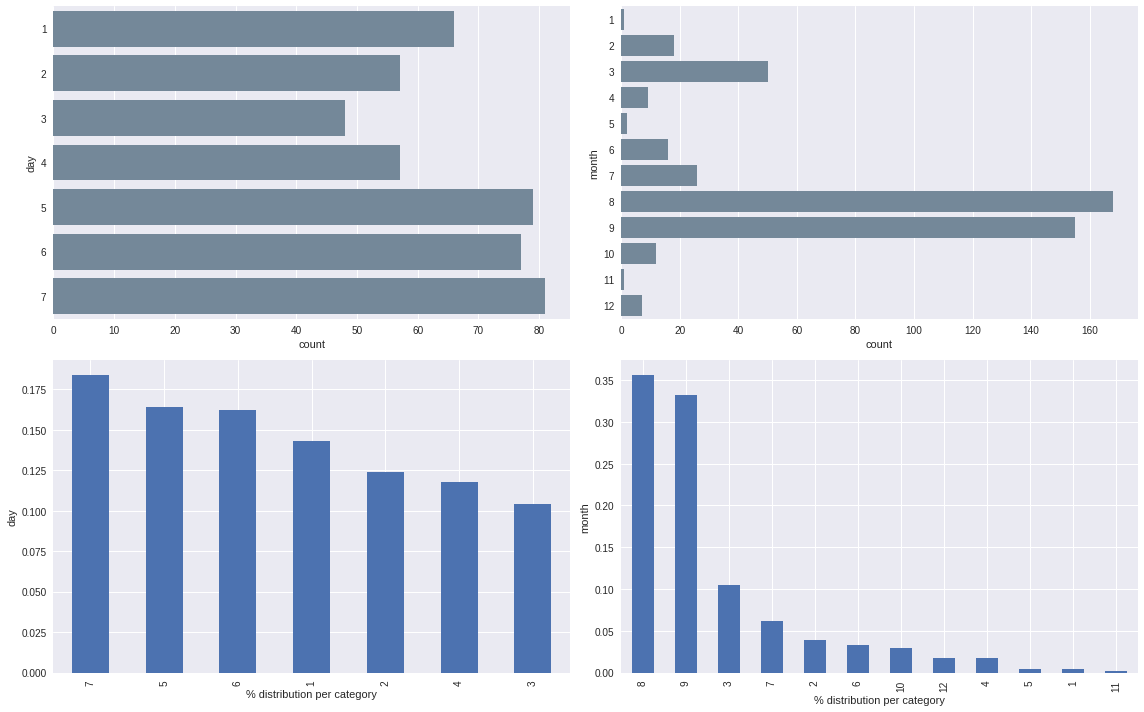

In [ ]:
# analyzing categorical columns
plt.figure(figsize=(16,10))
for i,col in enumerate(['day', 'month'],1):
    plt.subplot(2,2,i)
    sns.countplot(data=data_viz,y=col, color='#6e889f')
    
    plt.subplot(2,2,i+2)
    # data_viz[col].value_counts(normalize=True).reset_index().sort_values(by='index', ascending=True).set_index('index').plot.bar()#.droplevel(level=, axis=1)
    df[col].value_counts(normalize=True).plot.bar()
    # plt.xticks(ascending)
    

    plt.ylabel(col)
    plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()    

If we see our data montly, the August and September month had high occurence compared to other month. Summer in Portugal range in June to mid September.

In [ ]:
cols = ['1', '2', '3', '4', '5', '6', '7', '8', '9']
firenum_map_mat = np.full((9, 9), 0.0)
firearea_map_mat = np.full((9, 9), 0.0)
firedensity = np.full((9, 9), 0.0)

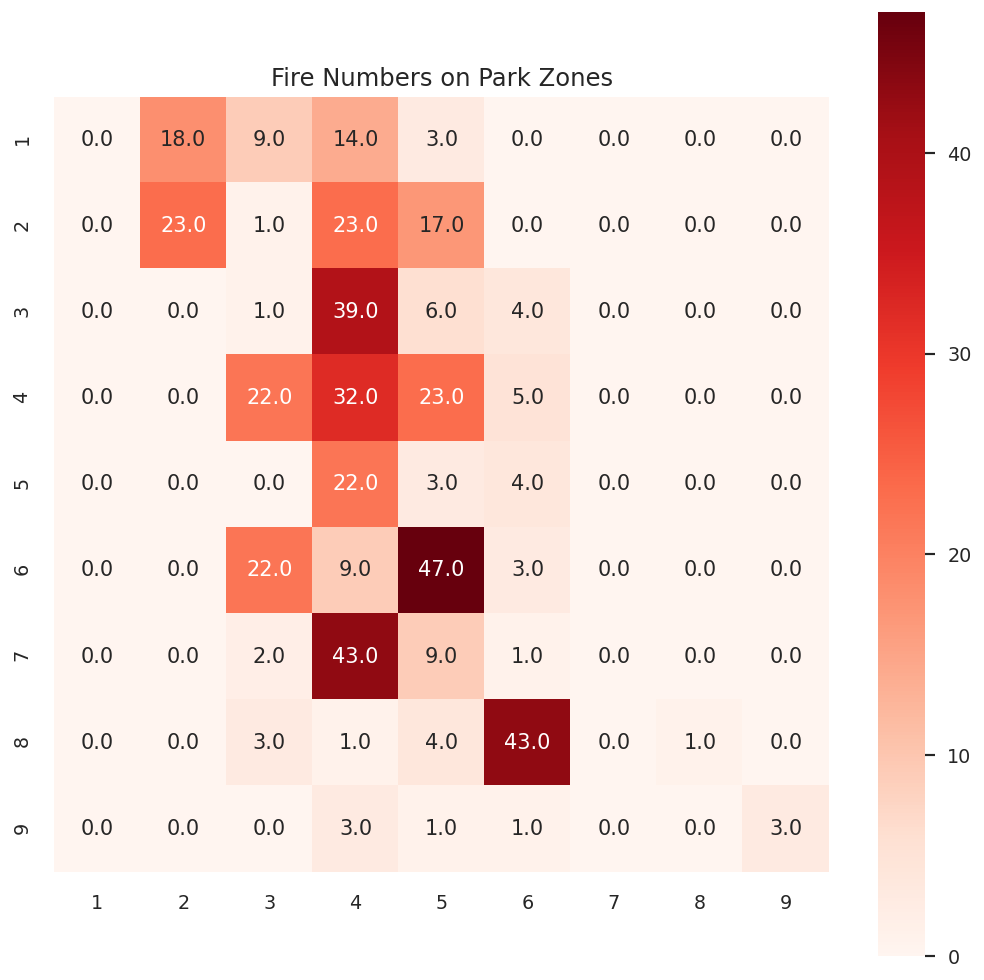

In [ ]:
for row in range(0, data_viz.shape[0]):
    x = data_viz.drop(columns=['day','month'])['X'][row]-1
    y = data_viz.drop(columns=['day','month'])['Y'][row]-1
    firenum_map_mat[x, y] += 1
    firearea_map_mat[x, y] += data_viz['area'][row]

for (x, y), value in np.ndenumerate(firenum_map_mat):
    if (firenum_map_mat[x, y] != 0):
        firedensity[x, y] = firearea_map_mat[x, y]/firenum_map_mat[x, y]

sns.set()
plt.figure(dpi = 125,figsize= (10,10))
heat_map = sns.heatmap(firenum_map_mat,
                       cbar=True,
                       annot=True,
                       square=True,
                       fmt='.1f',
                       annot_kws={'size': 12},
                       yticklabels=cols,
                       xticklabels=cols,
                       cmap='Reds',)
plt.title('Fire Numbers on Park Zones', size=14)
plt.show()

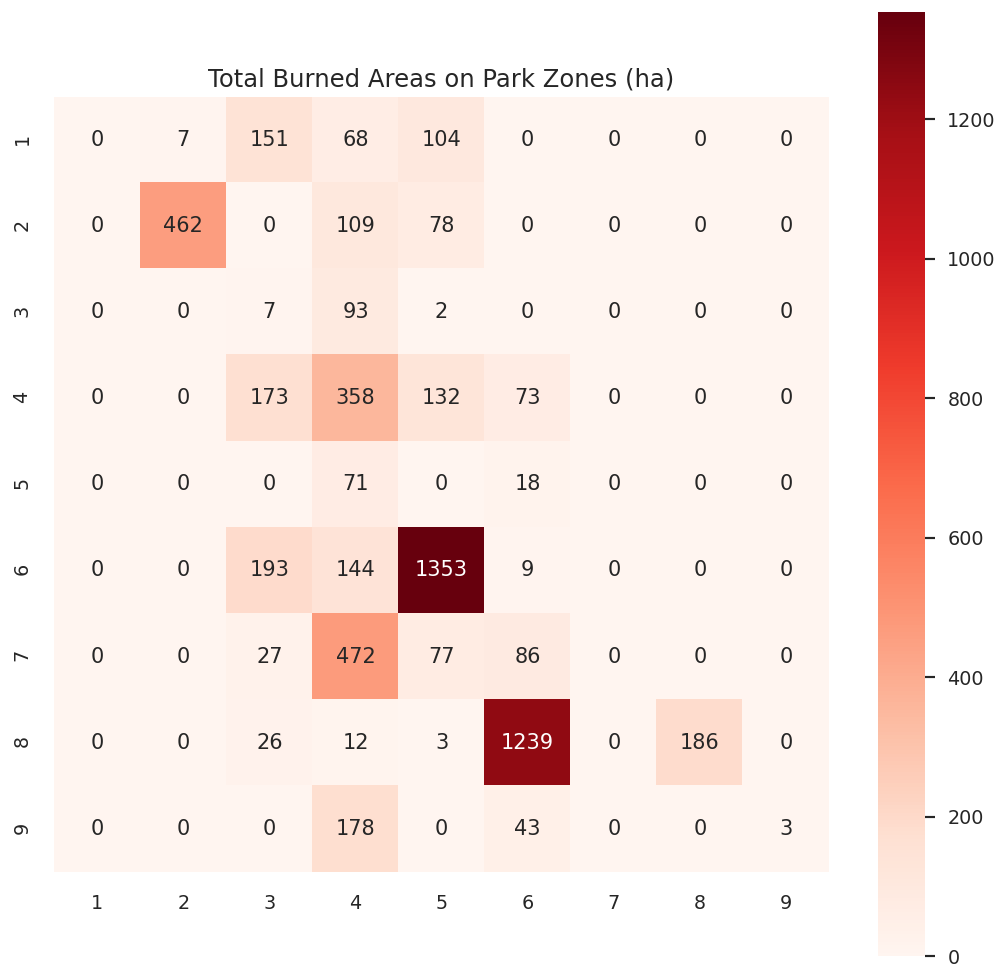

In [ ]:
sns.set()
plt.figure(dpi = 125,figsize= (10,10))
heat_map = sns.heatmap(firearea_map_mat,
                       cbar=True,
                       annot=True,
                       square=True,
                       fmt='.0f',
                       annot_kws={'size': 12},
                       yticklabels=cols,
                       xticklabels=cols,
                       cmap='Reds',)
plt.title('Total Burned Areas on Park Zones (ha)', size=14)
plt.show()

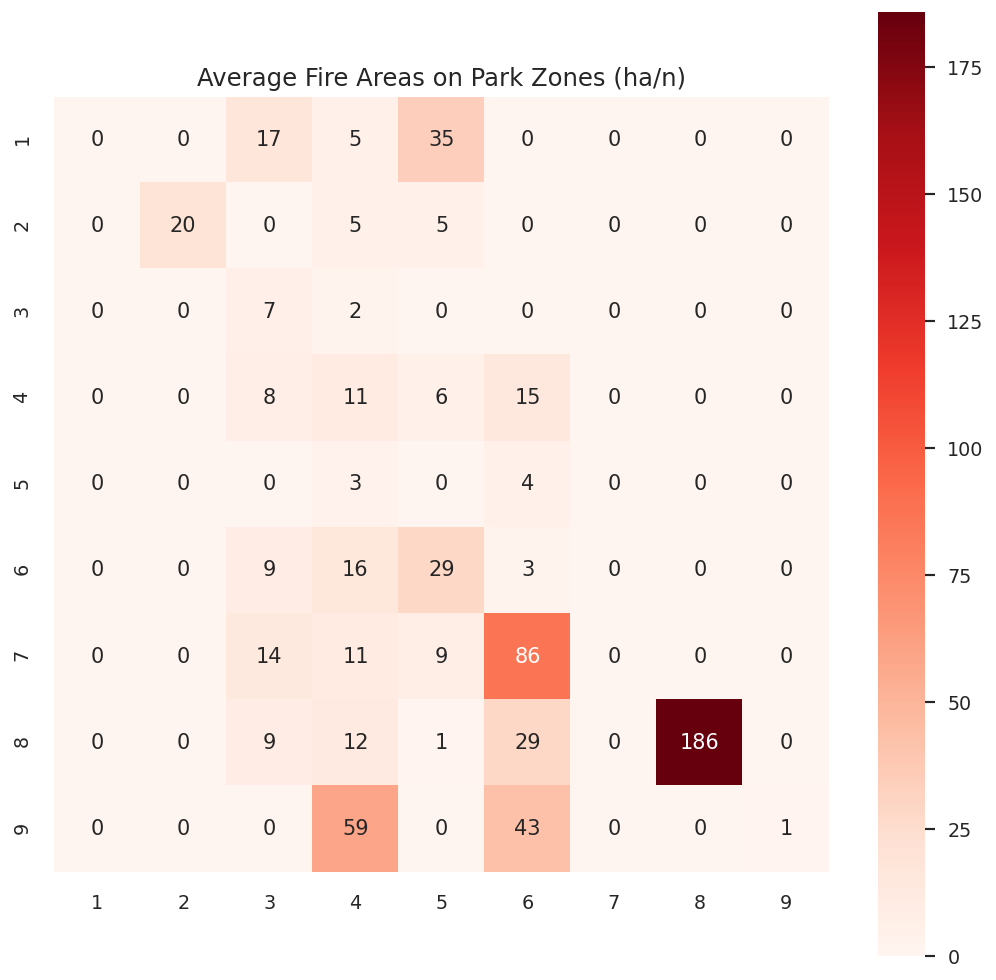

In [ ]:
sns.set()
plt.figure(dpi = 125,figsize= (10,10))
heat_map = sns.heatmap(firedensity,
                       cbar=True,
                       annot=True,
                       square=True,
                       fmt='.0f',
                       annot_kws={'size': 12},
                       yticklabels=cols,
                       xticklabels=cols,
                       cmap='Reds',)
plt.title('Average Fire Areas on Park Zones (ha/n)', size=14)
plt.show()

## 2.2 Feature Histogram

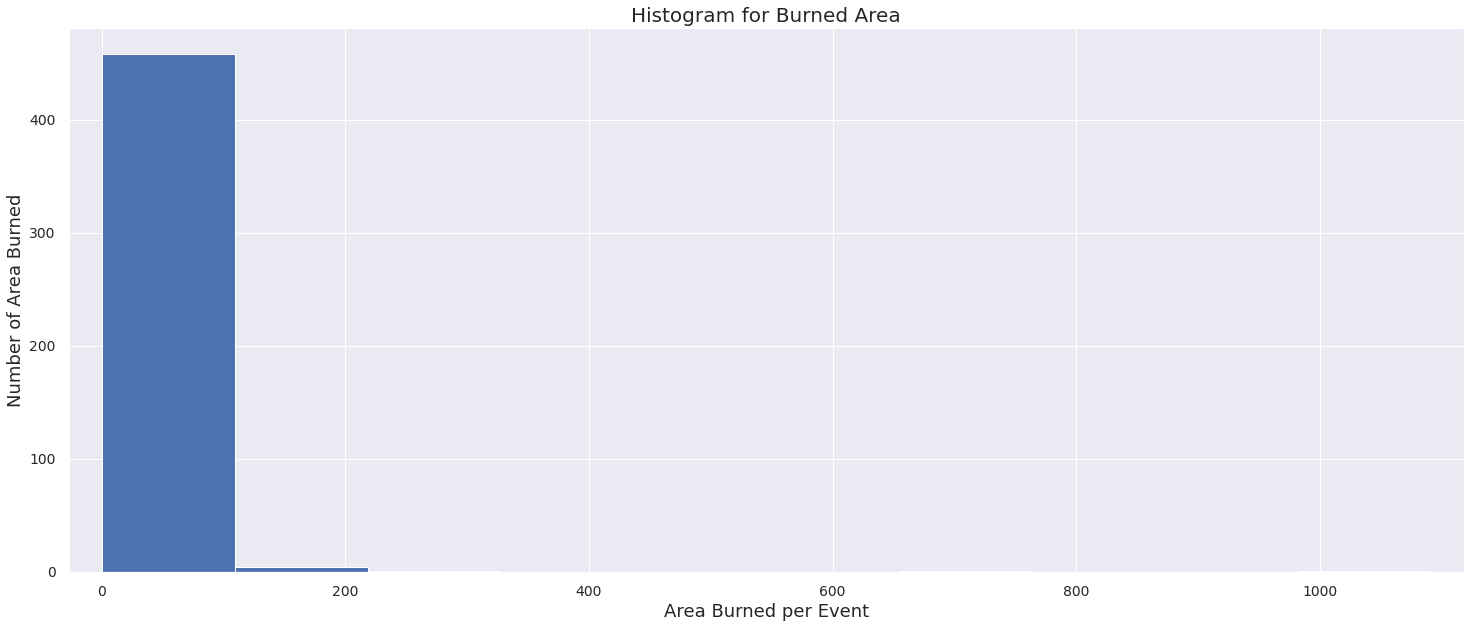

In [ ]:
# Plotting the histogram for the area attribute
from pandas.plotting import scatter_matrix

attributes = ['area']
scatter_matrix(data_viz[attributes], figsize=(25,10))
plt.xticks(size=14, rotation=0)
plt.yticks(size=14)
plt.ylabel('Number of Area Burned',fontsize=18)
plt.xlabel('Area Burned per Event',fontsize=18)

plt.title('Histogram for Burned Area', size=20)
plt.show()

Most of the burned areas were under 100m2. This is a sparse target data. For now, we'll try to make histogram for `log(area+1)`:

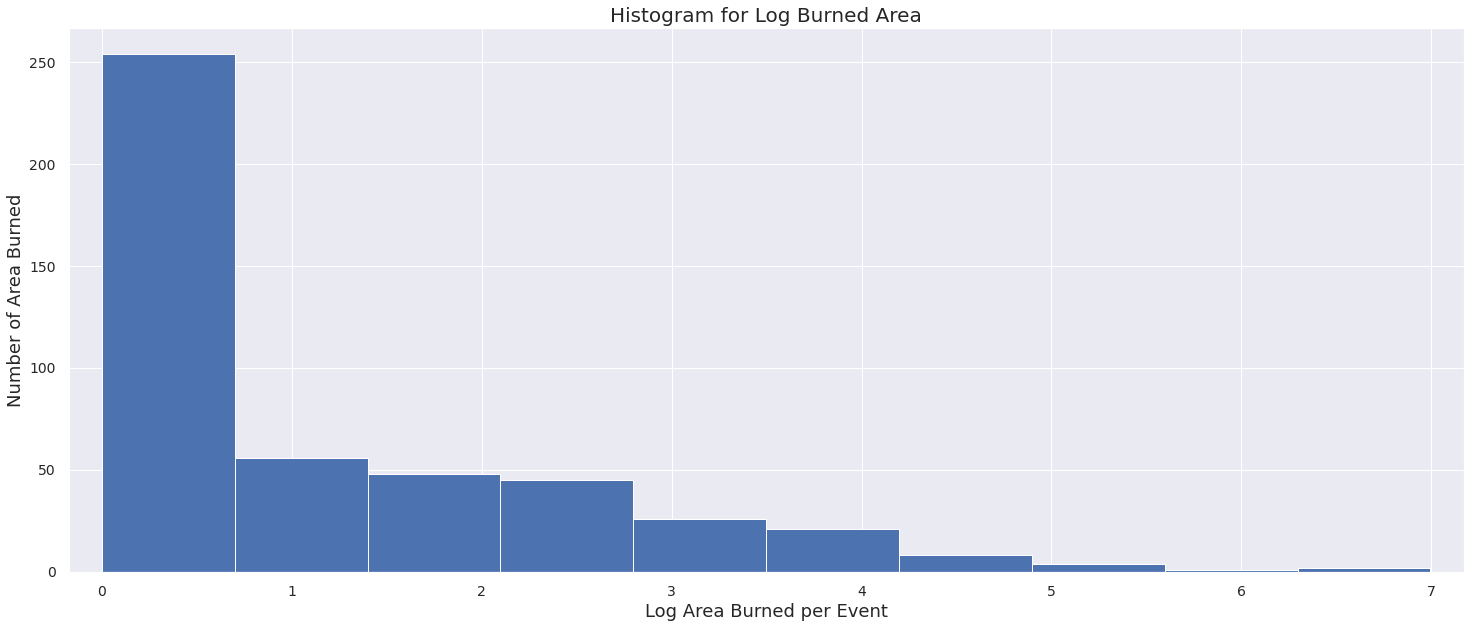

In [ ]:
attributes = ['area']
scatter_matrix(np.log1p(data_viz[attributes]), figsize=(25,10))
plt.xticks(size=14, rotation=0)
plt.yticks(size=14)
plt.ylabel('Number of Area Burned',fontsize=18)
plt.xlabel('Log Area Burned per Event',fontsize=18)

plt.title('Histogram for Log Burned Area', size=20)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


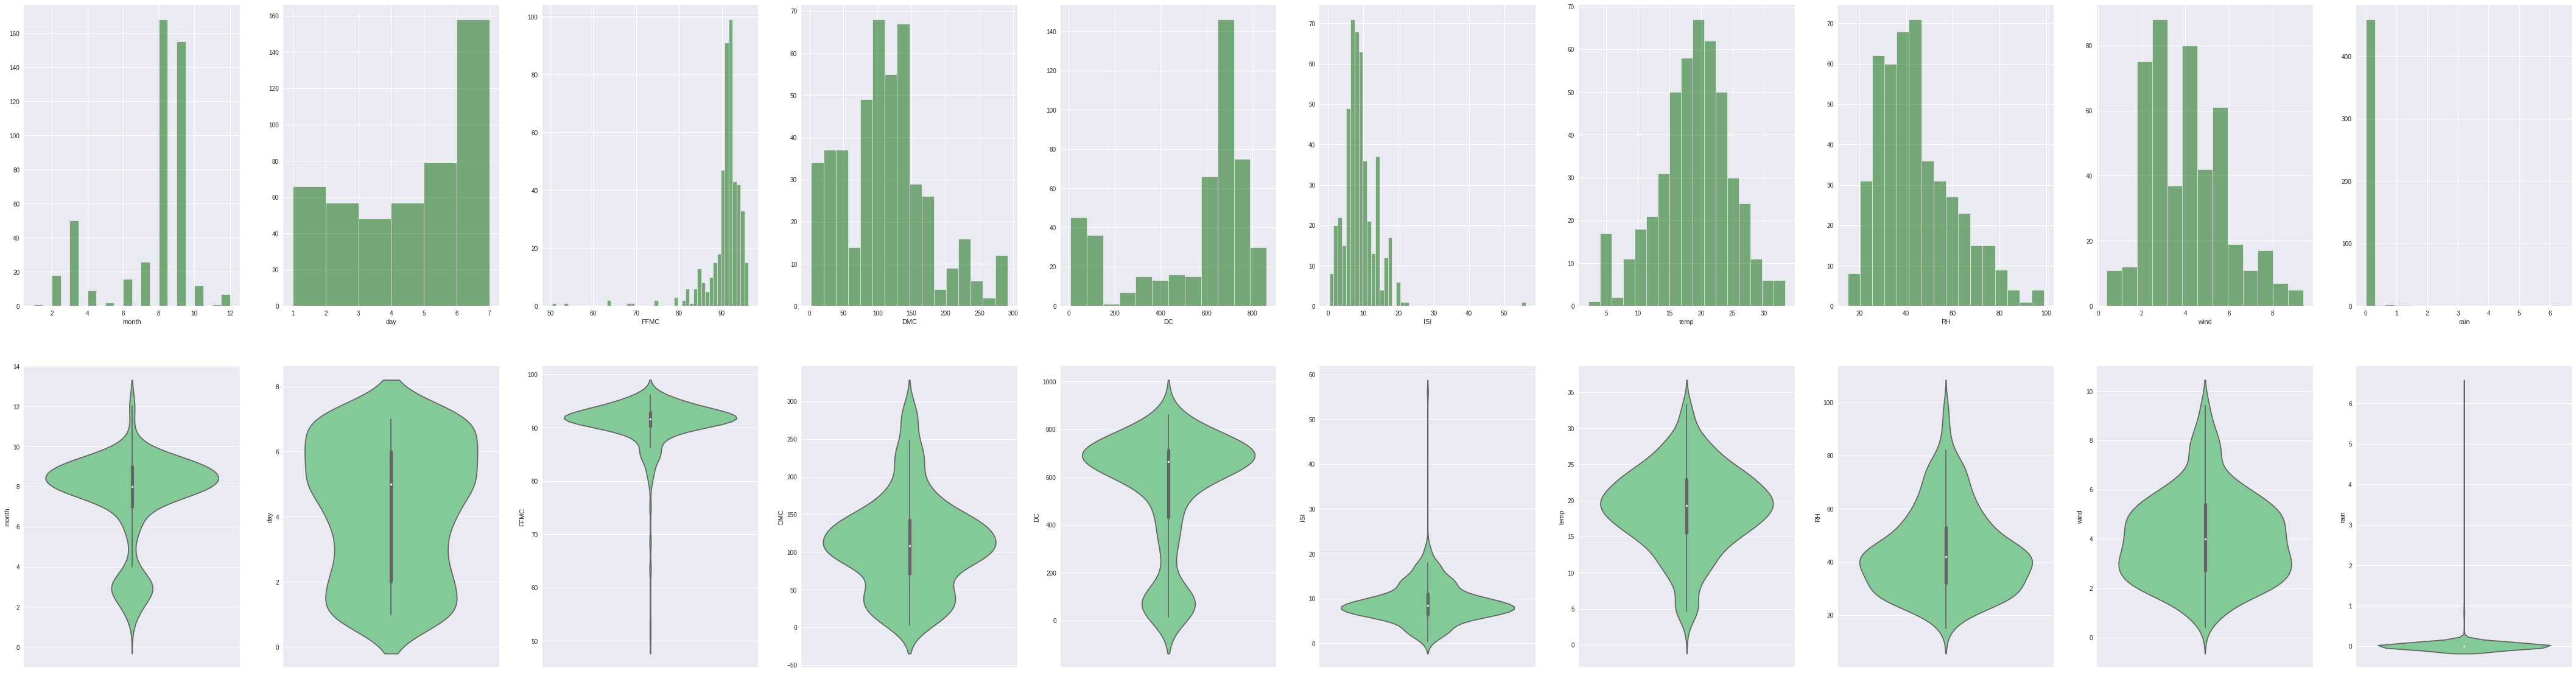

In [ ]:
plt.style.use('seaborn')
# color1 = '#636EFA'
color2 = '#78d694'
plot_data = data_viz.drop(columns=['X','Y','area'])
fig, ax2 = plt.subplots(2,len(plot_data.columns), figsize=(75, 20))

#Plotting distribution
for i in enumerate(plot_data.columns):
    plot1 = sns.distplot(plot_data[i[1]],
                 ax=ax2[0][i[0]],
                 kde=False, color='darkgreen', \
                 hist_kws={"linewidth": 1, "alpha": 0.5},
                 )
    plt.xticks()

#Plotting violin plot
for k in enumerate(plot_data.columns):
    sns.violinplot(y=k[1],
                   data=plot_data,
                   ax = ax2[1][k[0]],
                   color=color2)
    
plt.xticks(size=12)
    
#Decorating    
# plt.text(x = -1.75, y = 70, s = "Distribution and Violin Plot",
#                fontsize = 30, weight = 'bold', alpha = .75)

plt.show()

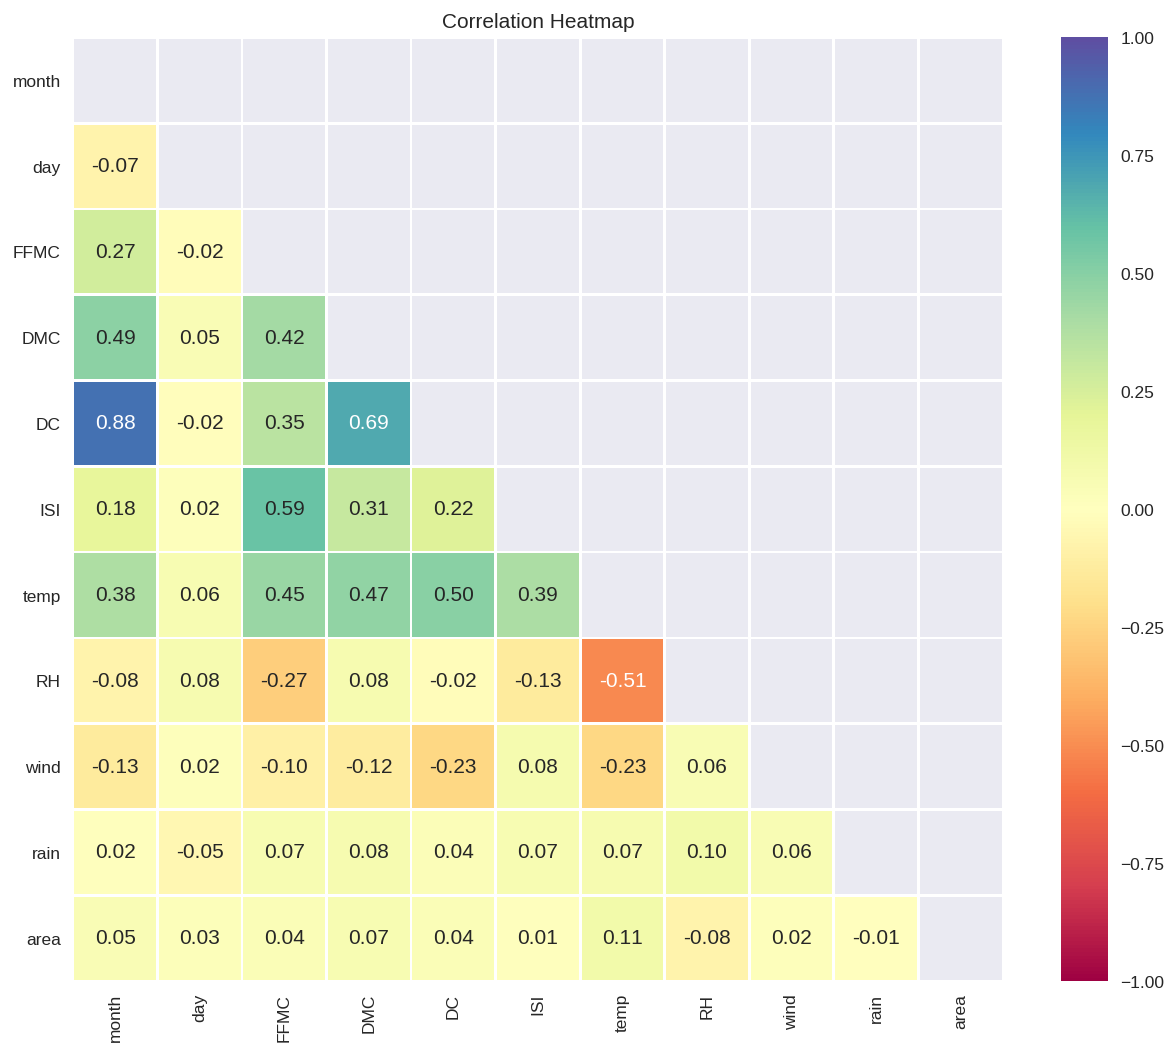

In [ ]:
plt.figure(dpi = 125,figsize= (12,10))
corr_data =data_viz.drop(columns=['X','Y',
                                #   'month','day'
                                  ])

mask = np.triu(np.ones_like(corr_data.corr(),dtype = bool))
sns.heatmap(corr_data.corr(),
             mask = mask,
            fmt = ".2f",
            annot=True,
            lw=1,
            cmap = 'Spectral', vmin =-1, vmax=1)
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Correlation Heatmap')

plt.show()

# 3. Data Preprocessing

We want to build a model that can learn the data well at all temporal variance. So the spatial and temporal data will be removed.

In [ ]:
X_train = X_train.drop(columns=['X','Y','month','day'])
X_test = X_test.drop(columns=['X','Y','month','day'])

## 3.1 Rain Feature

In [ ]:
for i in df.columns:
    print(i, len(df[i].value_counts()))

X 9
Y 7
month 12
day 7
FFMC 106
DMC 215
DC 219
ISI 119
temp 192
RH 75
wind 21
rain 7
area 251


In [ ]:
# # OHE for categorical data
# df = pd.get_dummies(df,columns=['day','month'],
#                     # drop_first=True
#                     )
# df.head()

Rain Feature

In [ ]:
df['rain'].value_counts()

0.0    509
0.8      2
0.2      2
0.4      1
6.4      1
1.4      1
1.0      1
Name: rain, dtype: int64

Since rain feature mostly contain zero values, we'll convert it into categorical data:
- `0`: rain intensity `< 0`,
- `1`: rain intensity `> 0`.

In [ ]:
X_train['rain'] = X_train['rain'].apply(lambda x: int(x > 0.0))
X_test['rain'] = X_test['rain'].apply(lambda x: int(x > 0.0))

## 3.2 Log Transform

In [ ]:
y_train = np.log1p(y_train)
y_test = np.log1p(y_test)

X_train[['FFMC','DMC','DC','ISI','temp','RH']] = np.log1p(X_train[['FFMC','DMC','DC','ISI','temp','RH']])
X_test[['FFMC','DMC','DC','ISI','temp','RH']] = np.log1p(X_test[['FFMC','DMC','DC','ISI','temp','RH']])

In [ ]:
df_train = pd.merge(X_train, y_train, left_index=True, right_index=True).reset_index().drop(columns='index')
df_test = pd.merge(X_test, y_test, left_index=True, right_index=True).reset_index().drop(columns='index')

### Outlier Area Data
Since our data contain so much outlier, especially the `area`, we'll remove all data with `abs(zscore(area)) > 3`, meaning we are going to remove the data located between `-3 to -4` and `3 to 4 (~0.25%)` in PDF

![image](http://www.robertbarrington.net/wp-content/uploads/2013/04/ZScores.jpg)

In [ ]:
# Outlier points
y_outliers = df_train[abs(zscore(df_train['area'])) >= 3 ]
y_outliers

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
112,4.537961,4.804840,6.515305,2.261763,2.954910,3.850148,1.8,0,5.307971
206,4.526127,4.965638,6.400922,2.451005,3.025291,3.737670,5.8,0,5.285637
207,4.502029,4.653008,6.069814,2.001480,3.161247,4.060443,4.9,0,5.633110
274,4.562263,5.408964,6.550509,2.701361,3.349904,3.332205,4.9,0,6.616440
288,4.537961,4.804840,6.515305,2.261763,3.261935,3.332205,4.0,0,6.995620


Since the data we are dealing with is a sparse data (mostly zero values, `< 100m2`) we are going to drop the area with outlier value

In [ ]:
df_train = df_train.drop(index=y_outliers.index).reset_index().drop(columns='index')
df_train

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,4.489759,3.284664,4.228293,1.568616,2.821379,3.332205,7.6,0,0.000000
1,4.521789,5.123369,6.624862,2.091864,2.970414,4.304065,8.5,0,0.000000
2,4.544358,5.200705,6.067963,2.484907,3.144152,3.891820,1.3,0,0.000000
3,4.546481,4.957235,6.572143,2.701361,3.173878,3.806662,5.4,0,0.000000
4,4.534748,4.637637,6.623401,2.240710,3.100092,3.496508,2.2,0,0.000000
...,...,...,...,...,...,...,...,...,...
455,4.526127,4.965638,6.400922,2.451005,2.533697,4.477337,4.5,0,0.000000
456,4.541165,4.787492,6.665047,2.140066,2.879198,3.367296,4.0,0,0.698135
457,4.566429,5.387701,6.538140,2.944439,3.374169,3.401197,1.8,0,1.925707
458,4.531524,4.724729,6.648077,2.014903,3.025291,3.828641,3.1,0,3.045950


Checking data distribution:

- Skewness is a measure of asymmetry of a distribution. Another measure that describes the shape of a distribution is kurtosis.
- In a normal distribution, the mean divides the curve symmetrically into two equal parts at the median and the value of skewness is zero.
- When a distribution is asymmetrical the tail of the distribution is skewed to one side-to the right or to the left.
- When the value of the skewness is negative, the tail of the distribution is longer towards the left hand side of the curve.
- When the value of the skewness is positive, the tail of the distribution is longer towards the right hand side of the curve.

In [ ]:
df_train.skew()

FFMC   -5.270150
DMC    -1.528458
DC     -1.833717
ISI    -0.846475
temp   -1.547845
RH      0.008756
wind    0.574608
rain    7.946146
area    1.084454
dtype: float64

`FFMC` feature still skewd, `rain` also has positive skewed since it's very sparse.

In [ ]:
# Outlier points
# ffmc_outliers = df[abs(zscore(df['FFMC'])) >= 3 ]
# ffmc_outliers

In [ ]:
# Removing FFMC Outlier
# df = df.drop(index=ffmc_outliers.index).reset_index().drop(columns='index')
# df

## 3.4 Data Splitting

In [ ]:
validsize = 0.2

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=validsize, random_state=seed)

print('Train Data:', len(X_train), '~', round(len(X_train)/len(df)*100,2),'%')
print('Validation Data:', len(X_valid), '~',round(len(X_valid)/len(df)*100,2),'%')
print('Test Data:', len(X_test), '~',round(len(X_test)/len(df)*100,2),'%')

Train Data: 372 ~ 71.95 %
Validation Data: 93 ~ 17.99 %
Test Data: 52 ~ 10.06 %


# 4. Model Training

## 4.1 Building Neural Network Architecture

Model Assumptions:
- Loss metrics: mean-squared-error
- Number of nodes, activation function, kernel init for all hidden nodes will be the same. For instance: <br>
`number_hidden_nodes1 == number_hidden_nodes2 == number_hidden_nodes3` <br>
`activation_function_1 == activation_function_2 == activation_function_3` <br>
`kernel_init_1 == kernel_init_2 == kernel_init_3` <br>


- Parameter regularizer l2 will be added into each neural hidden nodes to prevent overfitting


In [ ]:
def fit_model(trainX, trainy, validX, validy,
              input_model, epochs=400, batch_size=32):
    # fit model
    history_model = input_model.fit(trainX, trainy, 
                              validation_data=(validX, validy), 
                              epochs=epochs, verbose=0, 
                              batch_size=batch_size)
    output_hist = history_model.history
    train_score = input_model.evaluate(trainX, trainy, verbose=0)
    val_score = input_model.evaluate(validX, validy, verbose=0)

    return output_hist, train_score, val_score

### 4.1.1 Number of Hidden Layer

In [ ]:
def find_num_layer(layers):
    
    # Layer architecture
    layers = layers

    # define model
    model = Sequential()
    for i in range(len(layers)-2):
        model.add(Dense(layers[i+1], input_dim=layers[i],
                        activation='tanh',
                        kernel_initializer='uniform',
                        kernel_regularizer=tf.keras.regularizers.l2(0.01)))
    model.add(Dense(layers[-1], activation='relu'))

    # compile model
    opt = 'SGD'
    model.compile(loss='mean_squared_error', optimizer=opt,
                 metrics='mean_squared_error')
    
    return model

In [ ]:
layer_list = [[8, 20, 1],
              [8, 20, 20, 1],
              [8, 20, 20, 20, 1],
              [8, 20, 20, 20, 20, 20, 1]
              ]
layer_result = []
train_val = []
valid_val = []


for i in layer_list:
    result = fit_model(X_train, y_train, X_valid, y_valid,
              find_num_layer(i), epochs=400, batch_size=32)
    layer_result.append(result[0])
    train_val.append(result[1])
    valid_val.append(result[2])

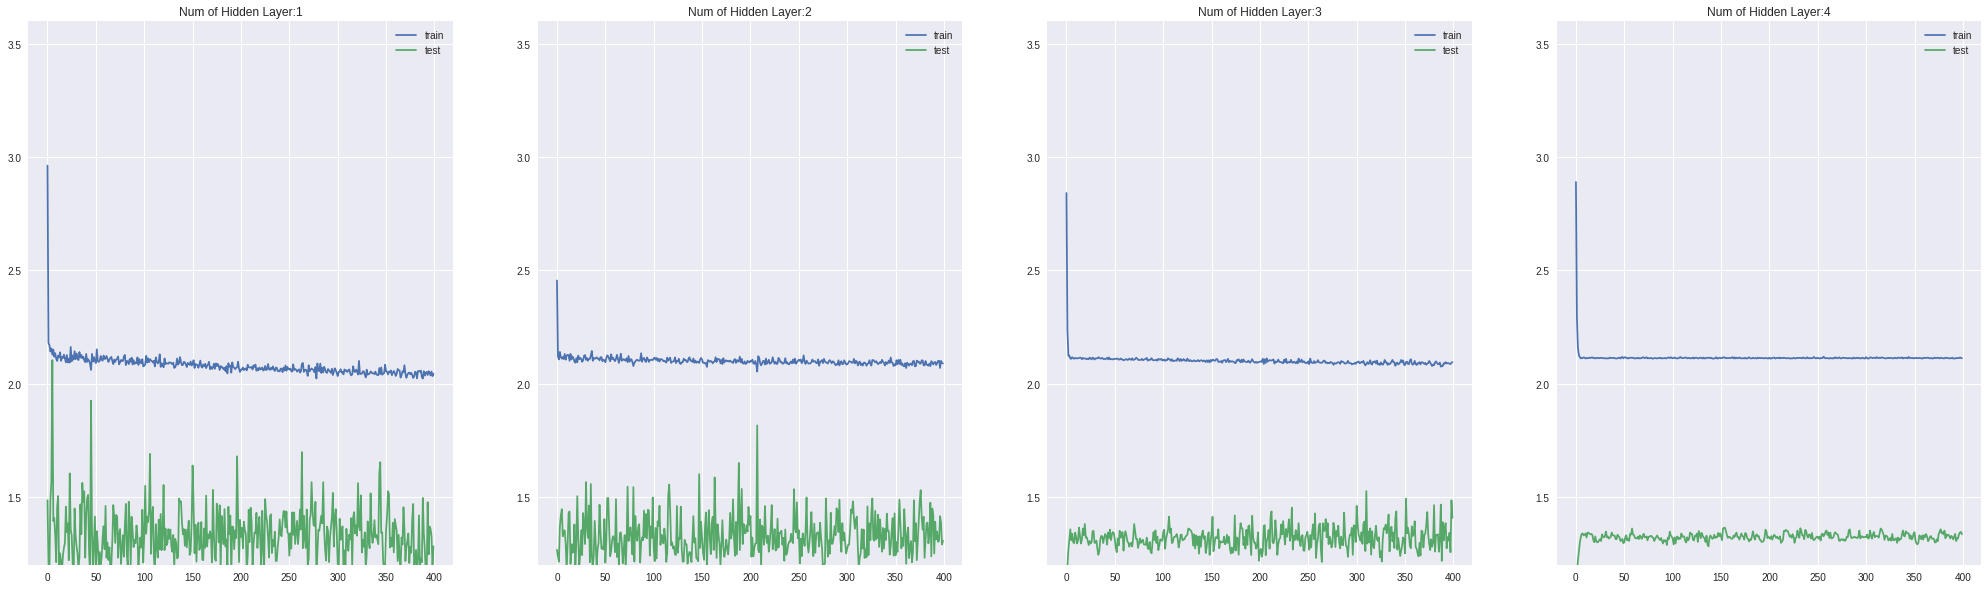

In [ ]:
n_col = len(layer_list)

fig, axs = plt.subplots(1, n_col, figsize=(35, 10), facecolor='w', edgecolor='k')

k = 0
for i in range(n_col):
    # for j in range(1):
    axs[i].set_title(f'Num of Hidden Layer:{k+1}')
    
    axs[i].set_ylim(1.2,3.6)
    # axs[i].set_xlim(-5,max(epochs))
    
    axs[i].plot(layer_result[k]['mean_squared_error'], label='train')
    axs[i].plot(layer_result[k]['val_mean_squared_error'], label='test')
    axs[i].legend()
    k=k+1

From above, we can see that ANN with most hidden layer number has most stable learning curve both for train and validation data.

### 4.1.2 Optimizer

In [ ]:
# fit a model and plot learning curve
def create_model(opt='SGD', 
              kernel_initializer='uniform',
              kernel_regularizer=tf.keras.regularizers.l2(0.01),
              activations=['relu'],
              beta_1=0.9, beta_2=0.999):
    
    # Layer architecture
    layers = [8, 20, 20, 20, 20, 20, 1]

    # define model
    model = Sequential()
    for i in range(len(layers)-2):
        model.add(Dense(layers[i+1], input_dim=layers[i],
                        activation=activations,
                        kernel_initializer=kernel_initializer,
                        kernel_regularizer=kernel_regularizer))
    model.add(Dense(layers[-1], activation='relu'))

    # compile model
    if opt=='adam':
        opt = Adam(learning_rate=0.001, beta_1=beta_1, beta_2=beta_2)
    model.compile(loss='mean_squared_error', optimizer=opt,
                 metrics='mean_squared_error')
    
    return model

In [ ]:
# define the grid search parameters
optimizer_list = ['SGD', 'RMSProp','adam']

# storage
plot_val2 = []
train_val2 = []
valid_val2 = []

# execute the search parameters
for i in range(len(optimizer_list)):
    # current optimizer
    current_opt = optimizer_list[i]

    # execute
    print(f'processing {current_opt} optimizers .../')
    model_out = fit_model(X_train, y_train, 
                          X_valid, y_valid,
                          create_model(opt=current_opt)
                          )
    plot_val2.append(model_out[0])
    train_val2.append(model_out[1])
    valid_val2.append(model_out[2])

processing SGD optimizers .../
processing RMSProp optimizers .../
processing adam optimizers .../


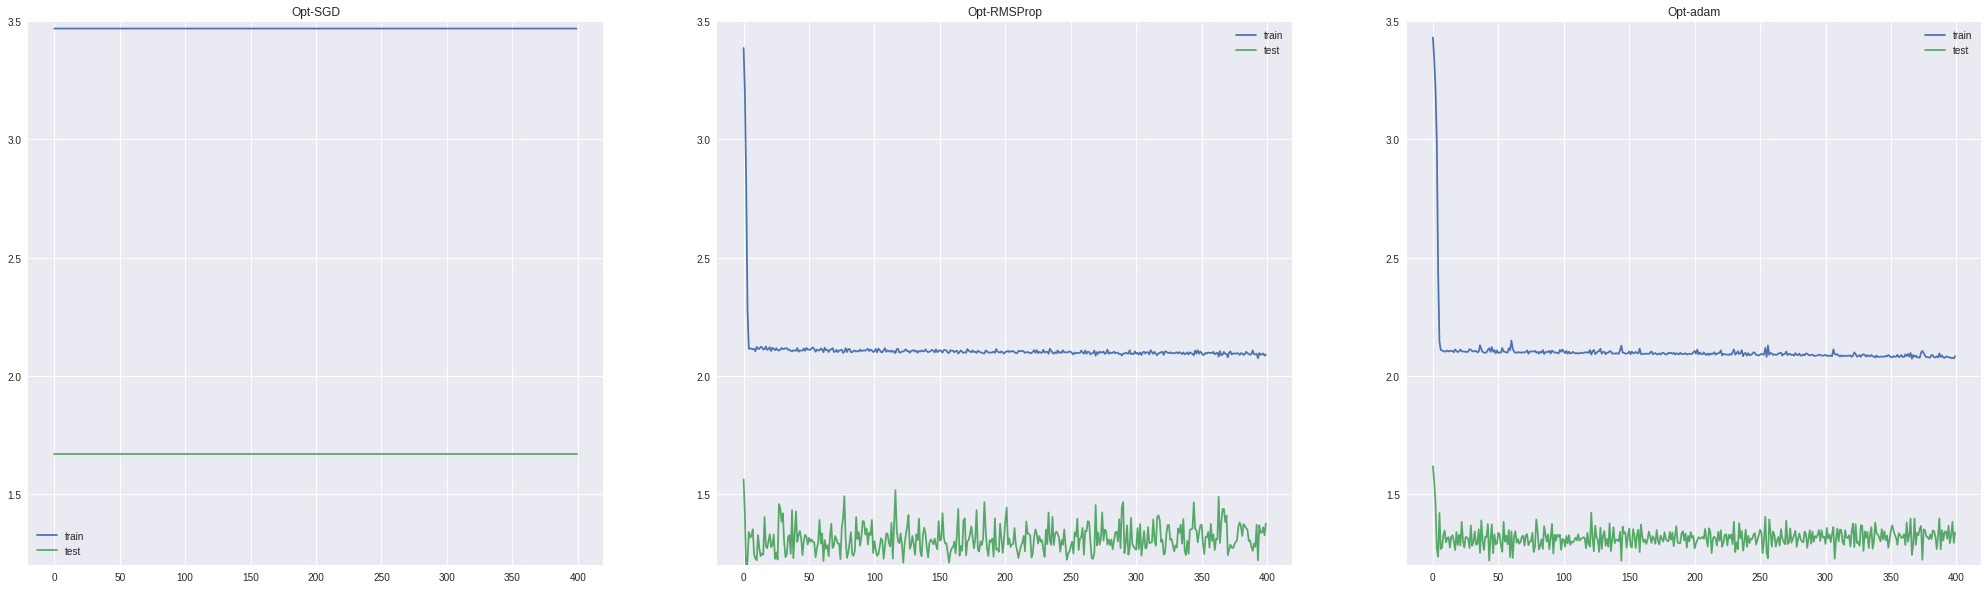

In [ ]:
n_col = len(optimizer_list)

fig, axs = plt.subplots(1, n_col, figsize=(35, 10), facecolor='w', edgecolor='k')


k = 0
for i in range(n_col):
    # for j in range(1):
    axs[i].set_title(f'Opt-{optimizer_list[i]}')
    
    axs[i].set_ylim(1.2,3.5)
    # axs[i].set_xlim(-5,max(epochs))
    
    axs[i].plot(plot_val2[k]['mean_squared_error'], label='train')
    axs[i].plot(plot_val2[k]['val_mean_squared_error'], label='test')
    axs[i].legend()
    k=k+1

From this figure, we can know that Adam Optimizer learn most fast and has most stable learning curve (both for train and validation data). So we'll continue with this option.

In [ ]:
best_opt = 'adam'

### 4.1.3 Adam Parameters: Momentum, RMSProp

In [ ]:
# define the grid search parameters
beta1_list = [0.5, 0.7, 0.8, 0.9]
beta2_list = [0.5, 0.7, 0.8, 0.999]

n_col = len(beta1_list)
n_row = len(beta2_list)

# storage
plot_val3 = []
train_val3 = []
valid_val3 = []

for i in range(n_col):
    for j in range(n_row):
        model_out = fit_model(X_train, y_train, X_valid, y_valid,
                            create_model(opt = best_opt,
                                         beta_1 = beta1_list[i], 
                                         beta_2 = beta2_list[j]))
        plot_val3.append(model_out[0])
        train_val3.append(model_out[1])
        valid_val3.append(model_out[2])

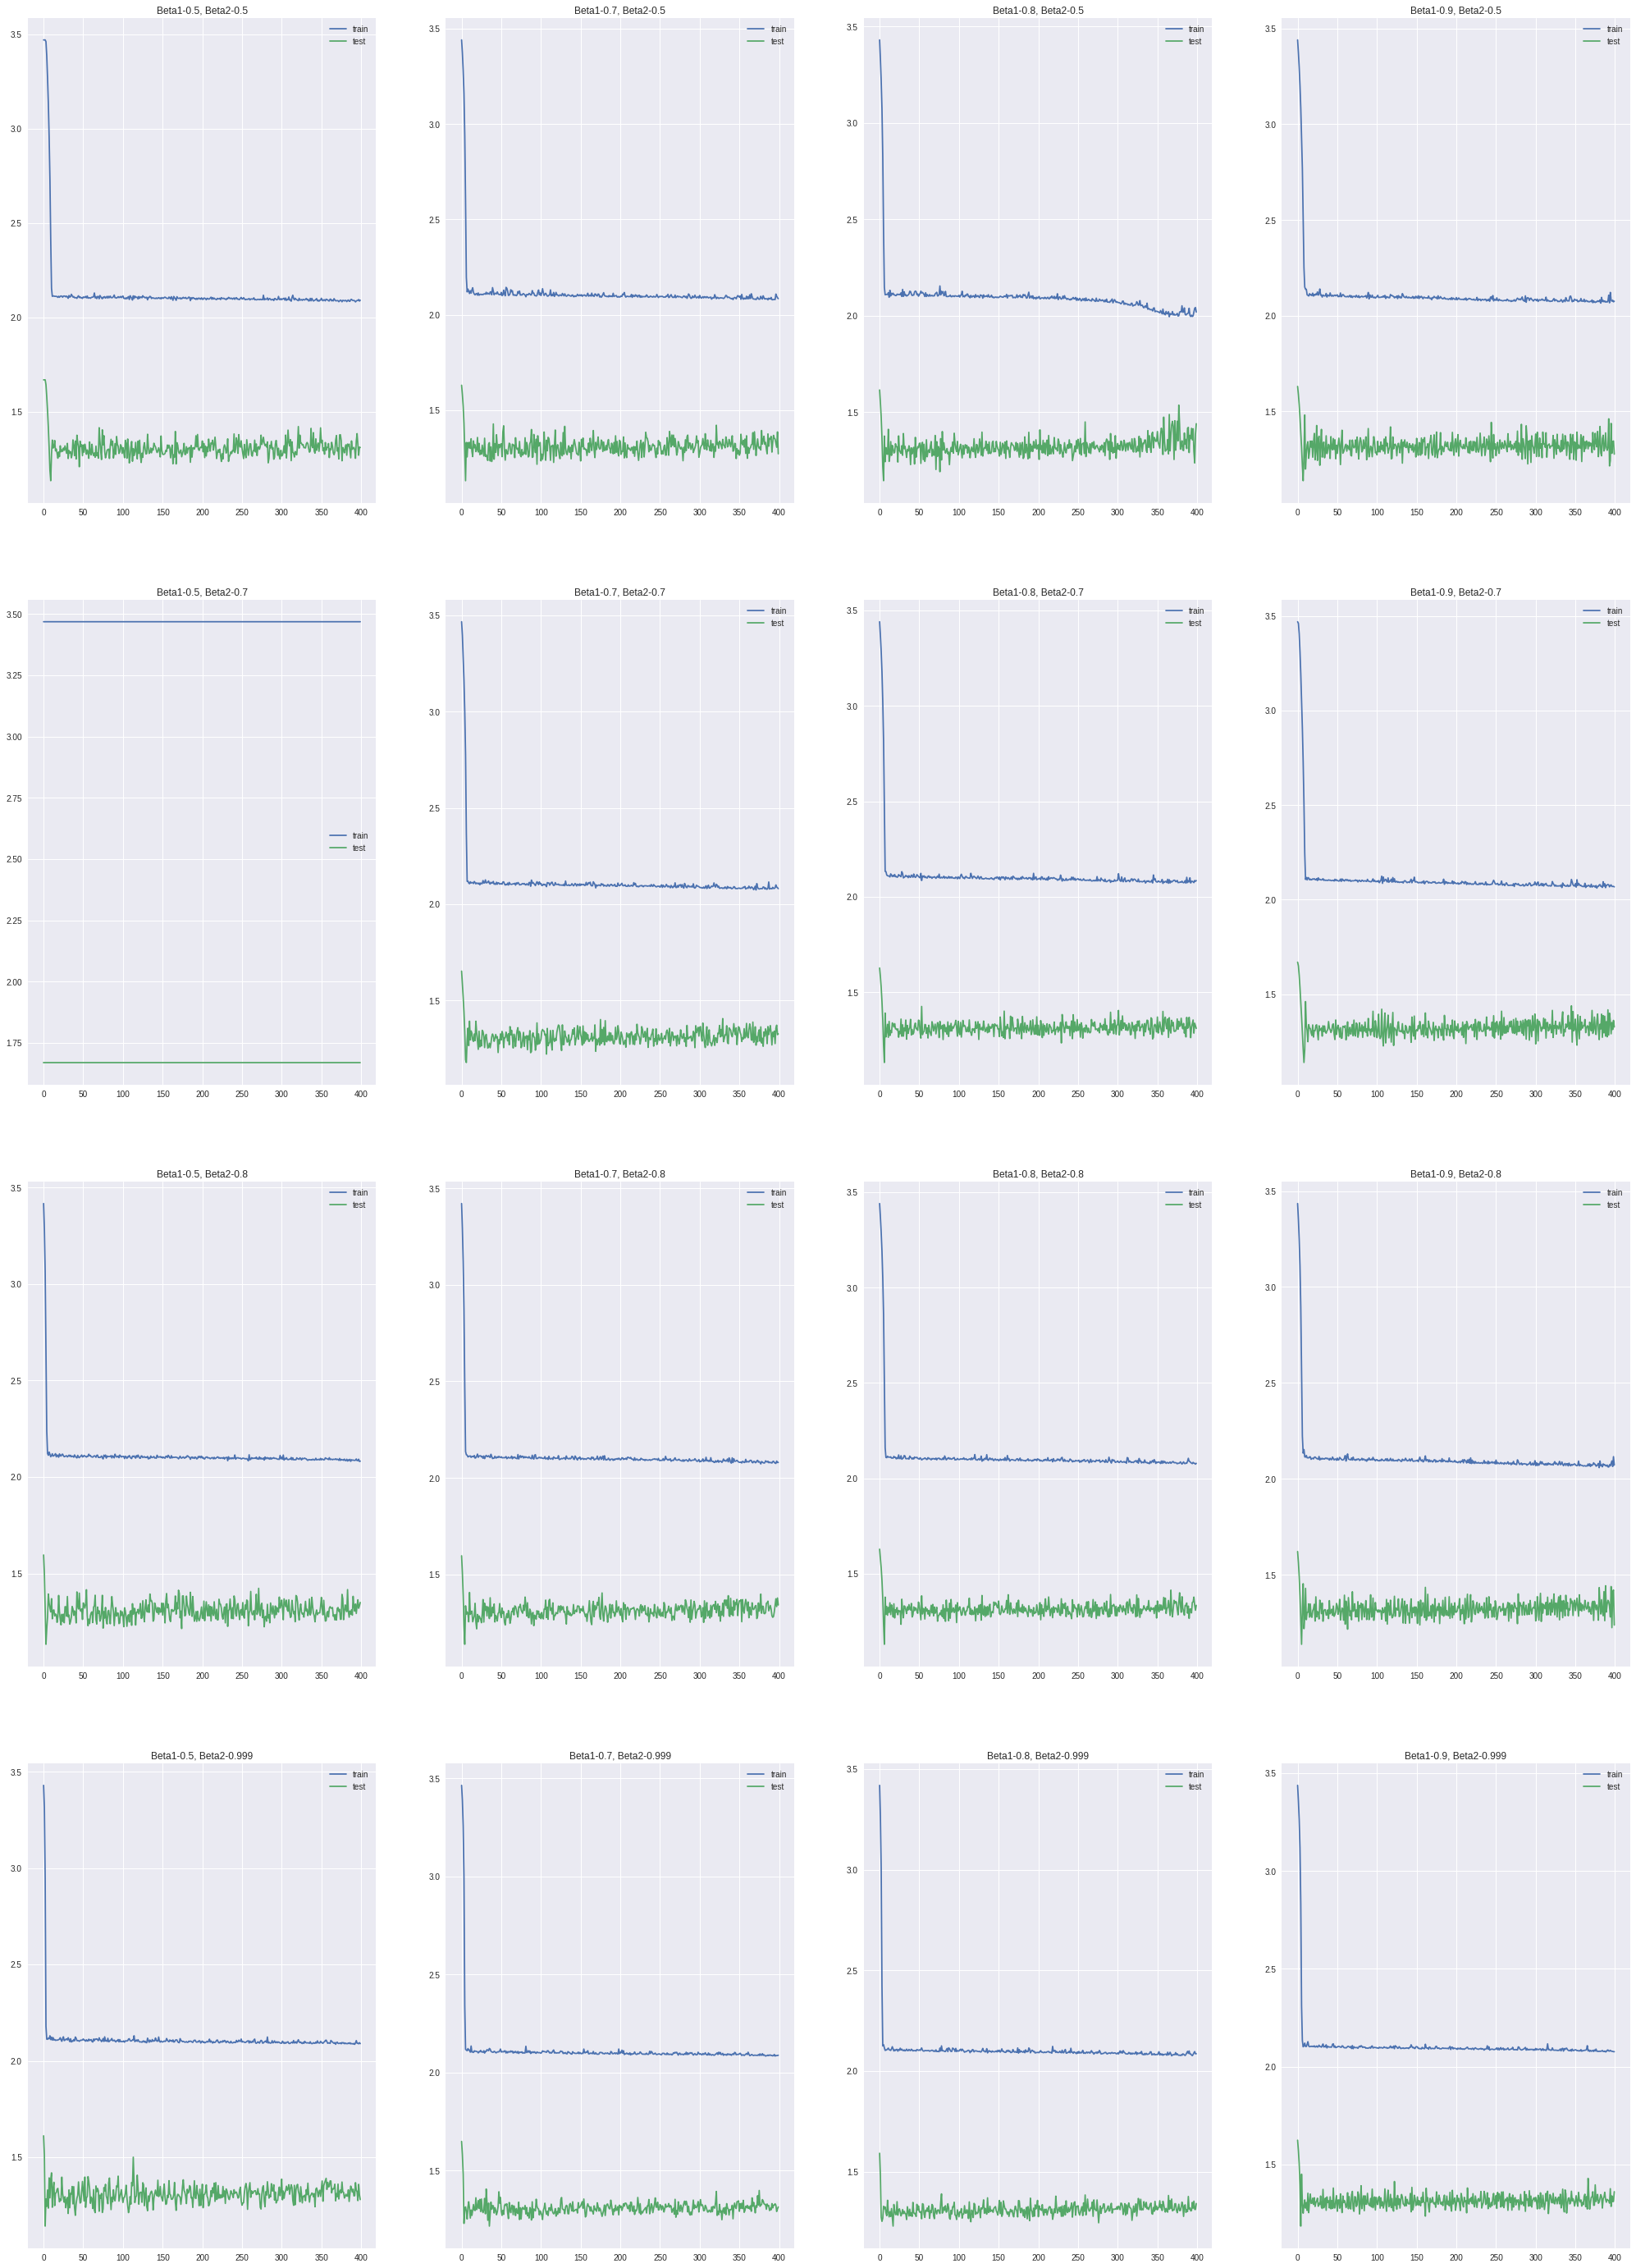

In [ ]:
fig, axs = plt.subplots(n_row, n_col, figsize=(35, 50), facecolor='w', edgecolor='k')


k = 0
for i in range(n_col):
    for j in range(n_row):
        axs[j, i].set_title(f'Beta1-{beta1_list[i]}, Beta2-{beta2_list[j]}')
        
        # axs[j, i].set_ylim(1.3,3.0)
        # axs[j, i].set_xlim(-5,max(epochs))
        
        axs[j, i].plot(plot_val3[k]['mean_squared_error'], label='train')
        axs[j, i].plot(plot_val3[k]['val_mean_squared_error'], label='test')
        axs[j, i].legend()
        k=k+1

The variation of `beta_1` and `beta_2` not vary too much. ut for now, we'll choose `beta_1 == 0.7` and `beta_2 == 0.999`

In [ ]:
best_beta1 = 0.7
best_beta2 = 0.999

### 4.1.4 Batch Size & Epoch

In [ ]:
# define the parameters
batch_size = [16, 32, 64, 128, len(X_train)]
epoch_num = [400, 800, 1000]

n_col = len(epoch_num)
n_row = len(batch_size)

plot_val4 = []
train_val4 = []
valid_val4 = []

for i in range(n_col):
    for j in range(n_row):
        model_out = fit_model(X_train, y_train, X_valid, y_valid,
                            create_model(opt =best_opt,
                                         beta_1 = best_beta1, 
                                         beta_2 = best_beta2),
                              batch_size = batch_size[j], epochs=epoch_num[i])
        plot_val4.append(model_out[0])
        train_val4.append(model_out[1])
        valid_val4.append(model_out[2])

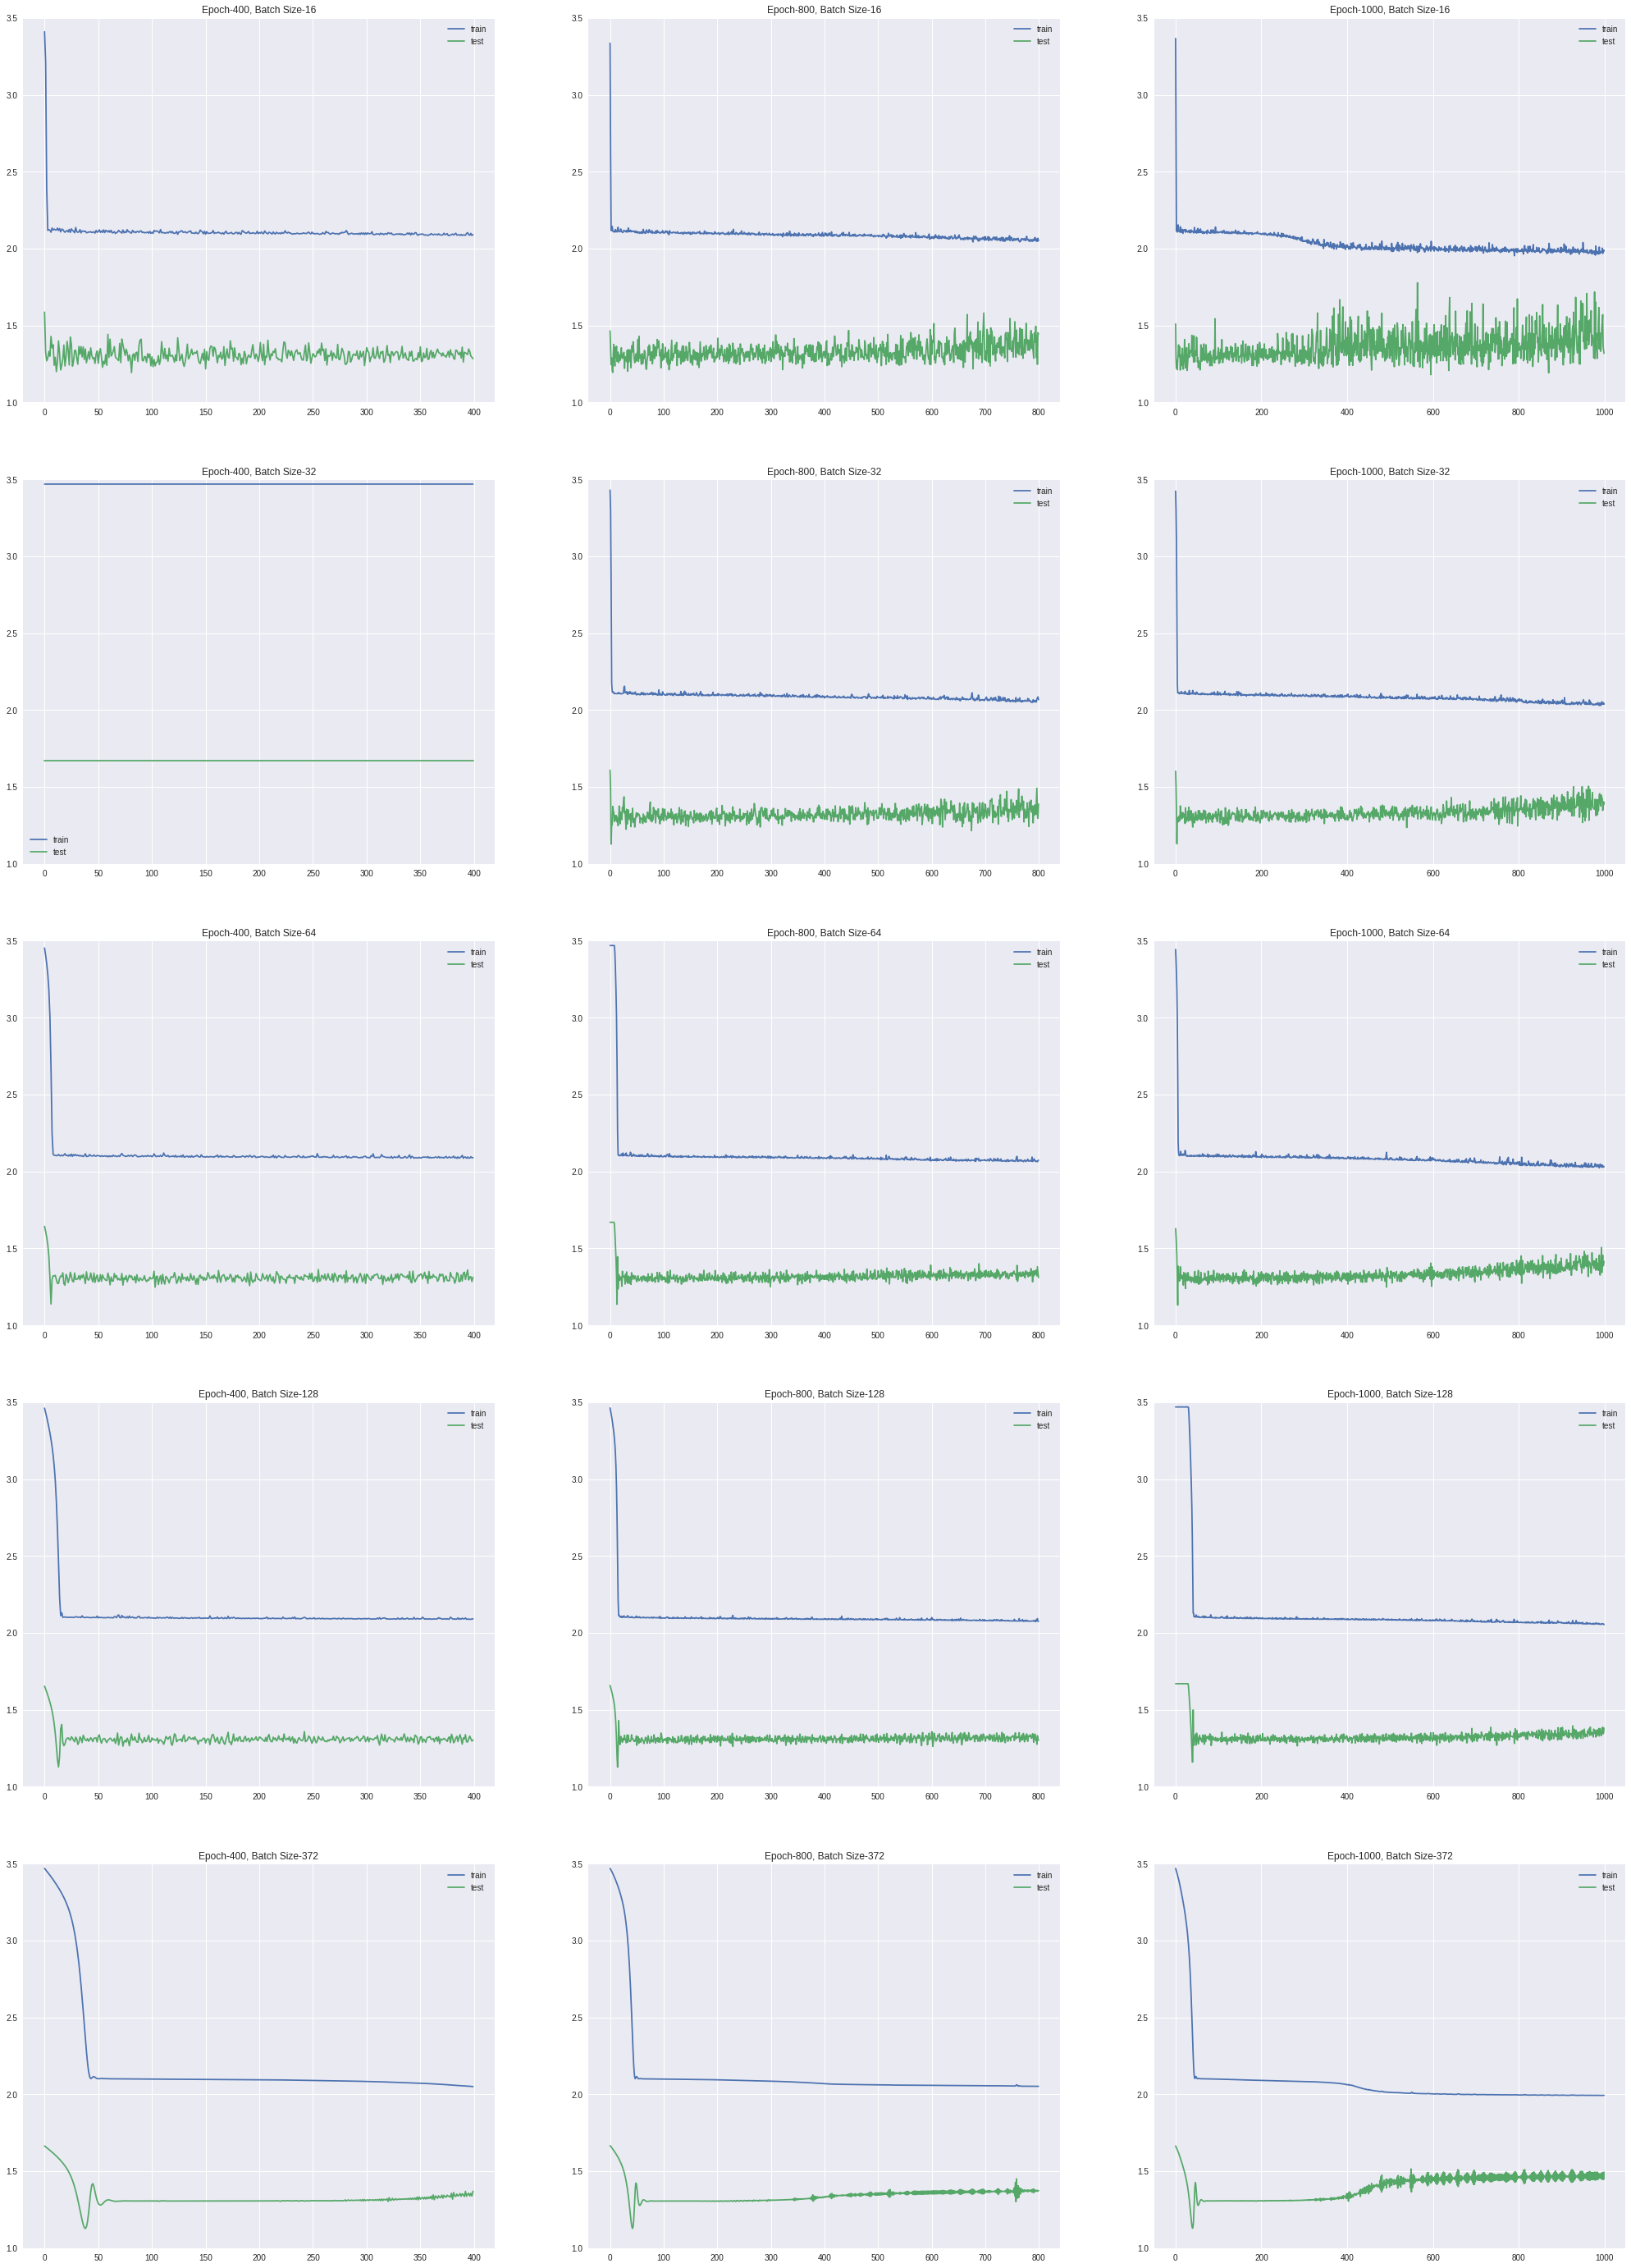

In [ ]:
fig, axs = plt.subplots(n_row, n_col, figsize=(35, 50), facecolor='w', edgecolor='k')

k = 0
for i in range(n_col):
    for j in range(n_row):
        axs[j, i].set_title(f'Epoch-{epochs[i]}, Batch Size-{batch_size[j]}')
        
        axs[j, i].set_ylim(1.0,3.5)
        # axs[j, i].set_xlim(-5,max(epochs))
        
        axs[j, i].plot(plot_val4[k]['mean_squared_error'], label='train')
        axs[j, i].plot(plot_val4[k]['val_mean_squared_error'], label='test')
        axs[j, i].legend()
        k=k+1

- The more batch_size used, the less wiggly training and validation learning curve.
- The more epochs used, the more model learn the data. But too high epoch can make the model diverge (eg. `Epoch = 1000`, `Batch size = train size`)

In [ ]:
best_batch_size = 128
best_epochs = 400

### 4.1.5 Activation Function & Kernel Initialization

We'll do some experiment with the activation function and kernel initializer for hiddden nodes.

Kernel Initializer:
- use Xavier / Glorot initialization recommended if the activation function is a Tanh
- He initialization is the recommended one if the activation function is a ReLU.

        To read list:
        
        - https://towardsdatascience.com/hyper-parameters-in-action-part-ii-weight-initializers-35aee1a28404
        - https://becominghuman.ai/priming-neural-networks-with-an-appropriate-initializer-7b163990ead

In [ ]:
activation_list = ['relu', 'tanh', 'linear', 'elu']

init_list =  [tf.keras.initializers.GlorotNormal,
              tf.keras.initializers.GlorotUniform,
              tf.keras.initializers.HeNormal,
              tf.keras.initializers.HeUniform]
init_name =  ['GlorotNormal', 'GlorotUniform','HeNormal', 'HeUniform']

n_col = len(activation_list)
n_row = len(init_list)

plot_val5 = []
train_val5 = []
valid_val5 = []

for i in range(n_col):
    for j in range(n_row):
        model_out = fit_model(X_train, y_train, X_valid, y_valid,
                            create_model(opt =best_opt,
                                         beta_1 = best_beta1, 
                                         beta_2 = best_beta2,
                                         activations=activation_list[i],
                                         kernel_initializer = init_list[j]),
                              batch_size = best_batch_size, epochs=best_epochs)
        plot_val5.append(model_out[0])
        train_val5.append(model_out[1])
        valid_val5.append(model_out[2])

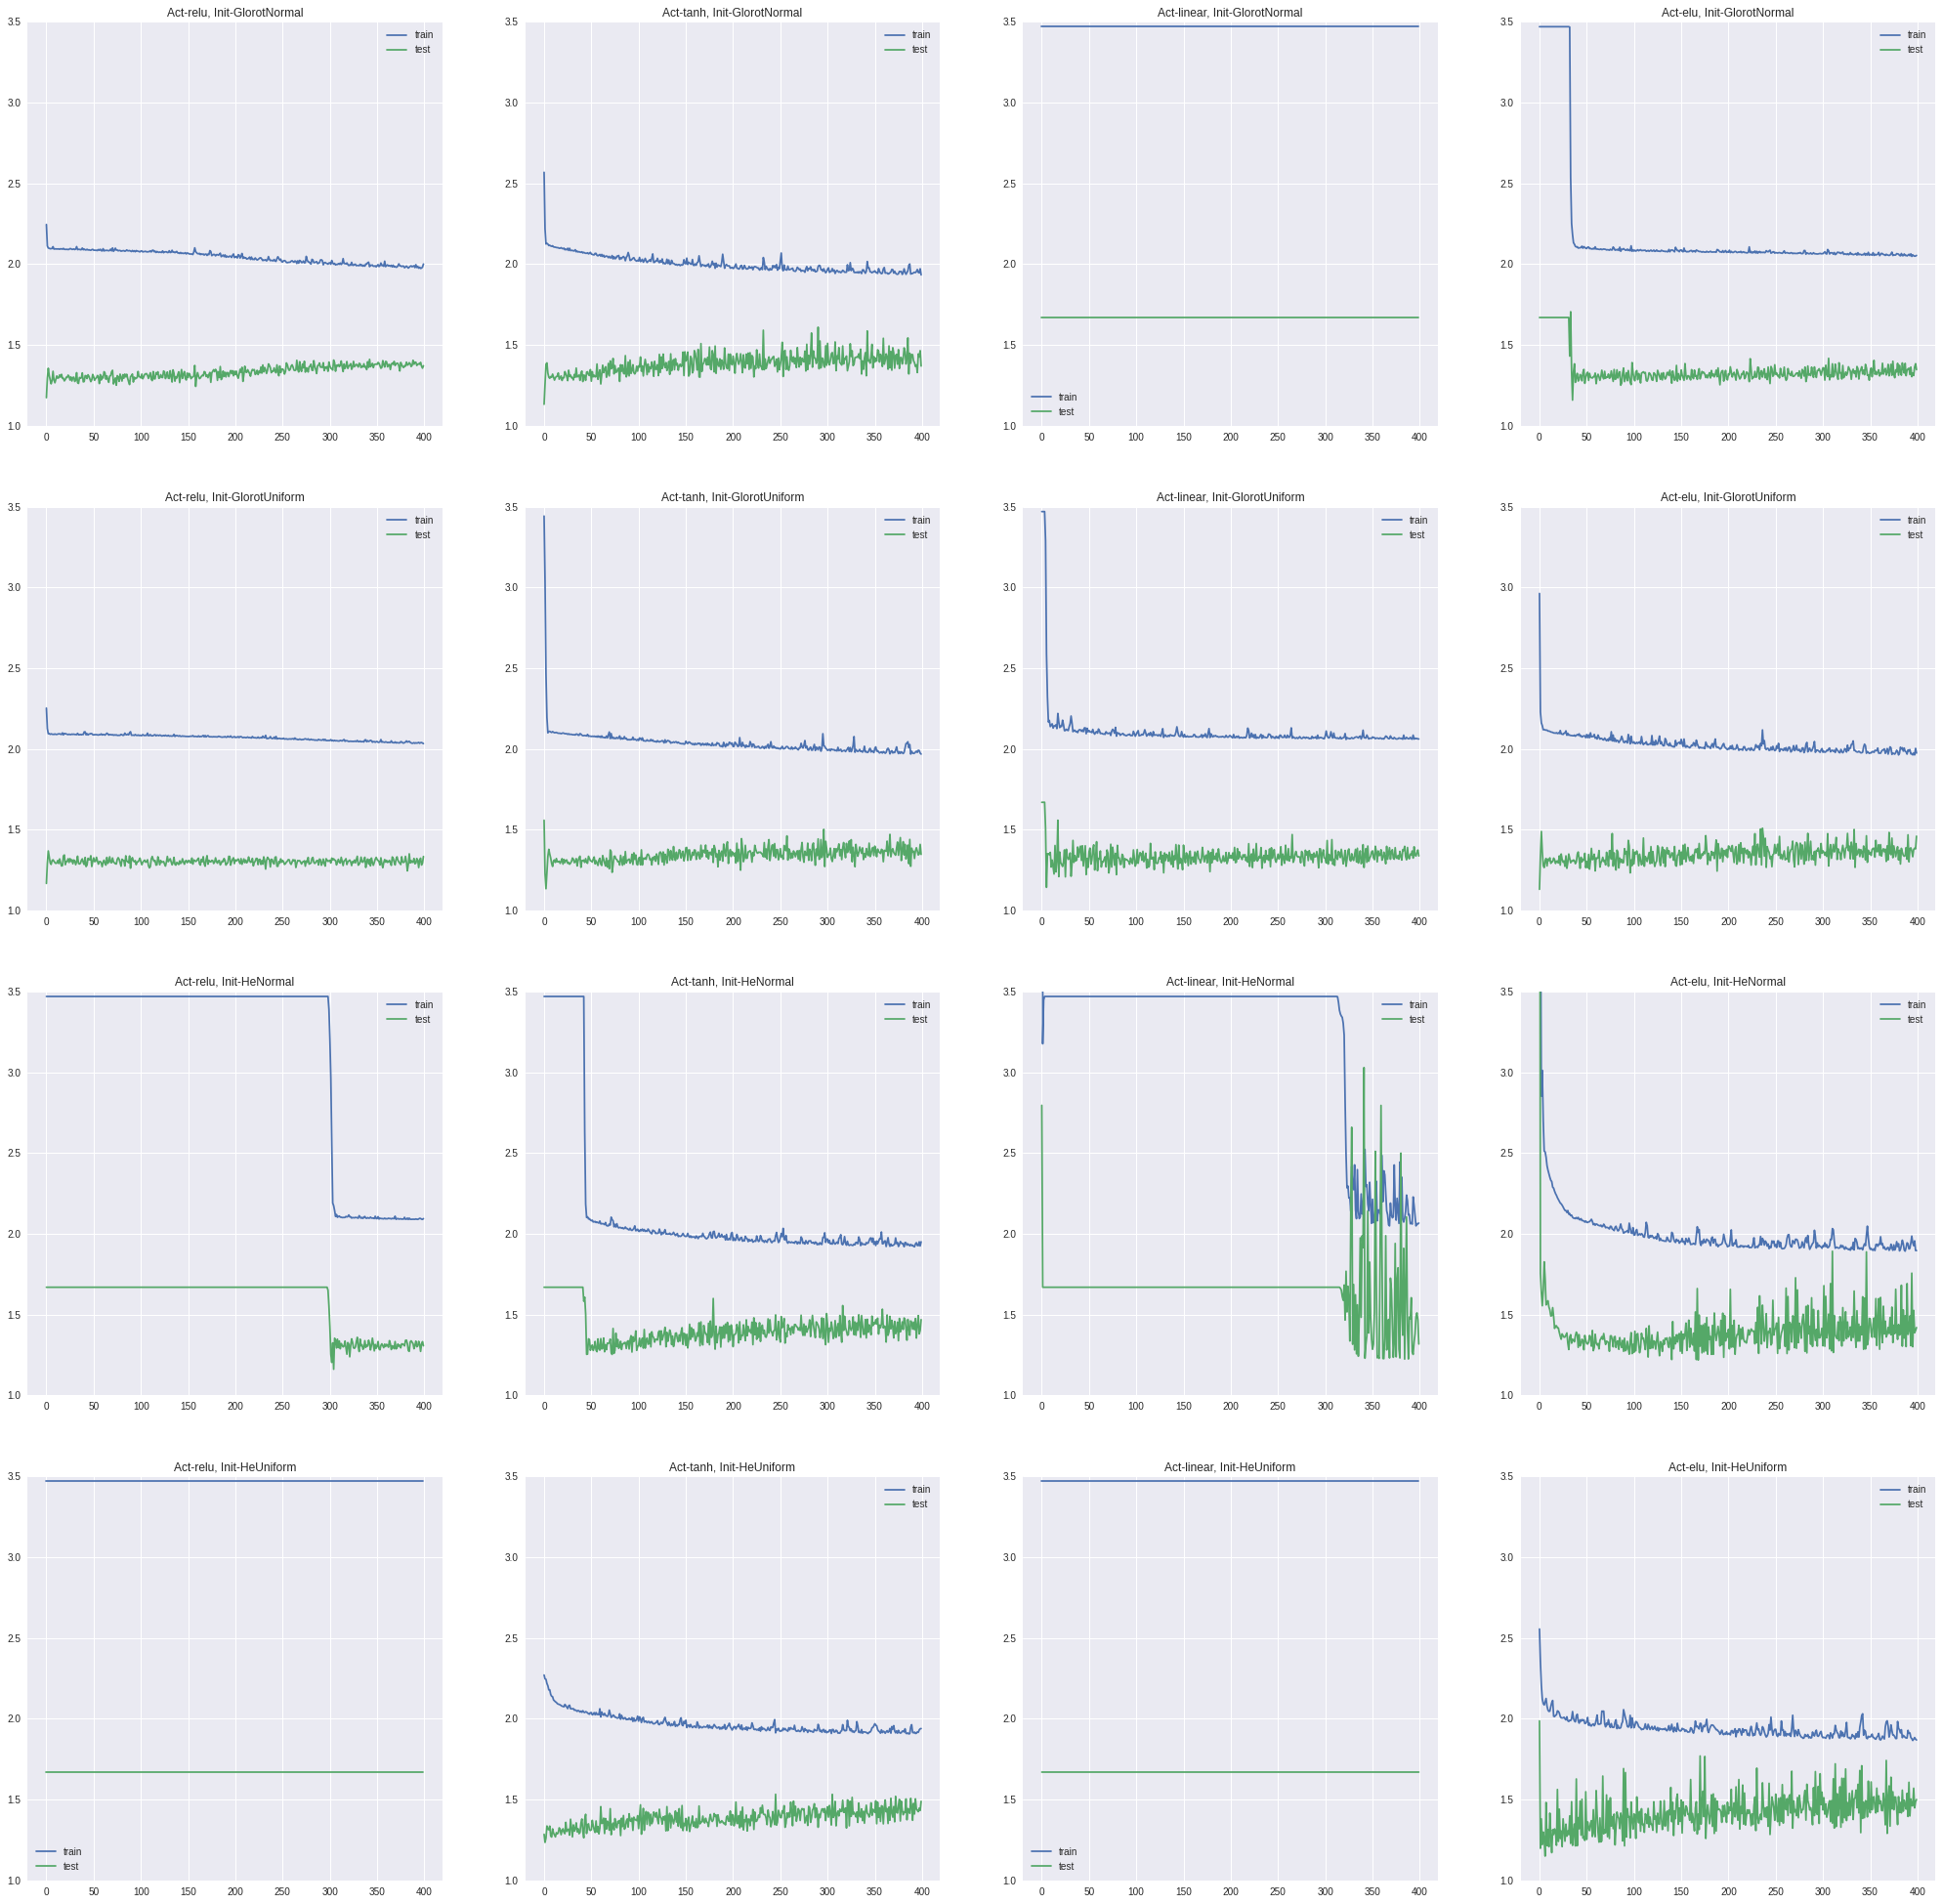

In [ ]:
fig, axs = plt.subplots(n_row, n_col, figsize=(35, 35), facecolor='w', edgecolor='k')

k = 0
for i in range(n_col):
    for j in range(n_row):
        axs[j, i].set_title(f'Act-{activation_list[i]}, Init-{init_name[j]}')
        
        axs[j, i].set_ylim(1.0,3.5)
        # axs[j, i].set_xlim(-5,210)
        
        axs[j, i].plot(plot_val5[k]['mean_squared_error'], label='train')
        axs[j, i].plot(plot_val5[k]['val_mean_squared_error'], label='test')
        axs[j, i].legend()
        k=k+1

For the sake of model simplicity, we'll assume that the activation function & kernel initalizer chosen will be applied to all hidden nodes.

The analysis for each activation should consider more literature. For now, we'll choose `'relu'` activation function and `GlorotUniform` kernel_init, since the stability, convergence, and learning speed with this combination perform best.

In [ ]:
best_actfunc = 'relu'
best_init = tf.keras.initializers.GlorotUniform

### 4.1.6 Number of Hidden Nodes

We also want to try the number of nodes for each hidden layer.

In [ ]:
# fit a model and plot learning curve
def find_hidden_nodes(opt=best_opt, 
              kernel_initializer=best_init,
              kernel_regularizer=tf.keras.regularizers.l2(0.01),
              activations=best_actfunc,
              beta_1=best_beta1, beta_2=best_beta2,
              hd_num=20
              ):
    
    # Layer architecture
    layers = [8, hd_num,hd_num,hd_num,hd_num,hd_num, 1]

    # define model
    model = Sequential()
    for i in range(len(layers)-2):
        model.add(Dense(layers[i+1], input_dim=layers[i],
                        activation=activations,
                        kernel_initializer=kernel_initializer,
                        kernel_regularizer=kernel_regularizer))
    model.add(Dense(layers[-1], activation='relu'))

    # compile model
    if opt=='adam':
        opt = Adam(learning_rate=0.001, beta_1=beta_1, beta_2=beta_2)
    model.compile(loss='mean_squared_error', optimizer=opt,
                 metrics='mean_squared_error')
    
    return model

In [ ]:
plot_val6 = []
train_val6 = []
valid_val6 = []

hidden_nodes = [20,30,50]

n_col = len(hidden_nodes)
for i in range(n_col):        
    model_out = fit_model(X_train, y_train, X_valid, y_valid,
                        find_hidden_nodes(opt =best_opt,
                                        beta_1 = best_beta1, 
                                        beta_2 = best_beta2,
                                        activations=best_actfunc,
                                        kernel_initializer = best_init,
                                        hd_num=hidden_nodes[i]),
                            batch_size = best_batch_size, epochs=best_epochs)
    plot_val6.append(model_out[0])
    train_val6.append(model_out[1])
    valid_val6.append(model_out[2])

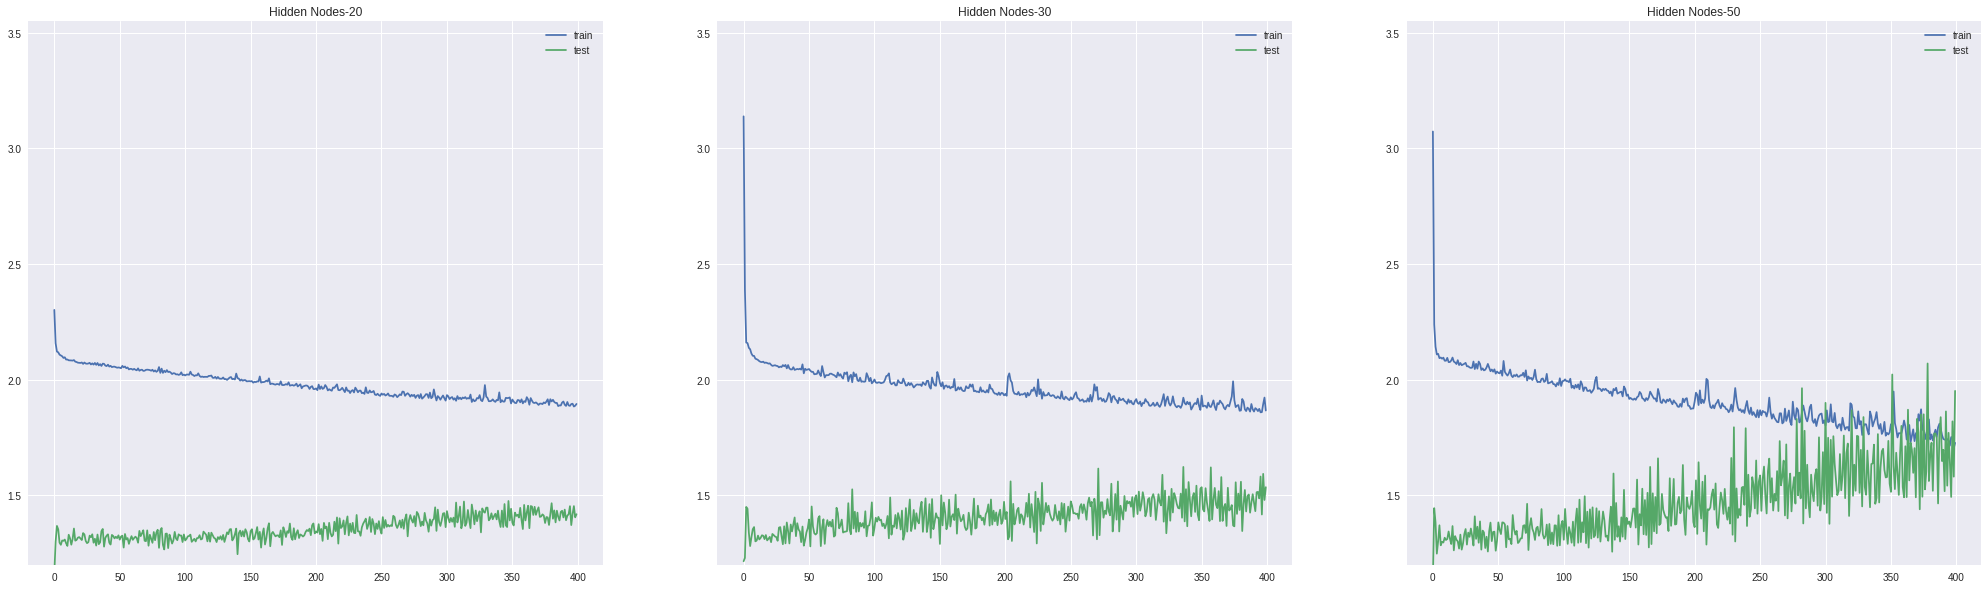

In [ ]:
fig, axs = plt.subplots(1, n_col, figsize=(35, 10), facecolor='w', edgecolor='k')

k = 0
for i in range(n_col):
    # for j in range(n_row):
        axs[i].set_title(f'Hidden Nodes-{hidden_nodes[i]}')
        
        axs[i].set_ylim(1.2,3.55)
        # axs[i].set_xlim(-5,210)
        
        axs[i].plot(plot_val6[k]['mean_squared_error'], label='train')
        axs[i].plot(plot_val6[k]['val_mean_squared_error'], label='test')
        axs[i].legend()
        k=k+1

We can see that learning curve with `number of nodes for each hidden layer == 20`, performs less wiggly curve and our model learnes the train data most fast. Although at some point of epochs, the learning curve for validation data starts to increase. Welll try some early stopping scheme later.

In [ ]:
best_hidden = 20

In [ ]:
# # create the model
# # define the grid search parameters
# activation = ['softmax', 'relu', 'tanh', 'linear']
# init = ['uniform', 'normal', 'zero']

# # make a dictionary of the grid search parameters
# param_grid = dict(activation1=activation, activation2=activation)

# Kmodel = KerasRegressor(build_fn=build_model,
#                         epochs = best_epochs,
#                         batch_size = best_batch_size,
#                         verbose=0)

# # build and fit the GridSearchCV
# gridmodel = GridSearchCV(estimator = Kmodel, param_grid = param_grid, 
#                          cv = KFold(random_state=seed), verbose = 0)

# grid_results = gridmodel.fit(X_train_fwim, y_train_fwim)

# # make a dictionary of the grid search parameters
# param_grid = dict(batch_size=batch_size, epochs=epochs)

# # create the model
# Kmodel = KerasRegressor(build_fn=build_model, verbose=0)

# # build and fit the GridSearchCV
# gridmodel = GridSearchCV(estimator = Kmodel, param_grid = param_grid, 
#                          cv = KFold(random_state=seed), verbose = 10)
# grid_results = gridmodel.fit(X_train_fwim, y_train_fwim)

# def plot_grid_search(cv_results, grid_param_1, grid_param_2, name_param_1, name_param_2):
#     # Get Test Scores Mean and std for each grid search
#     scores_mean = cv_results['mean_test_score']
#     scores_mean = np.array(scores_mean).reshape(len(grid_param_2),len(grid_param_1))

#     scores_sd = cv_results['std_test_score']
#     scores_sd = np.array(scores_sd).reshape(len(grid_param_2),len(grid_param_1))

#     # Plot Grid search scores
#     _, ax = plt.subplots(1,1)

#     # Param1 is the X-axis, Param 2 is represented as a different curve (color line)
#     for idx, val in enumerate(grid_param_2):
#         ax.plot(grid_param_1, scores_mean[idx,:], '-o', label= name_param_2 + ': ' + str(val))

#     ax.set_title("Grid Search Scores", fontsize=20, fontweight='bold')
#     ax.set_xlabel(name_param_1, fontsize=16)
#     ax.set_ylabel('CV Average Score', fontsize=16)
#     ax.legend(loc="best", fontsize=15)
#     ax.grid('on')

# # Calling Method 
# plot_grid_search(grid_results.cv_results_, epochs, batch_size, 'Epochs', 'Batch Size')

# # summarize the results
# print("Best: {0}, using {1}".format(grid_results.best_score_, grid_results.best_params_))

## 4.2 Early Stopping

Further read:
https://towardsdatascience.com/a-practical-introduction-to-early-stopping-in-machine-learning-550ac88bc8fd

In [ ]:
def create_model(opt='SGD', 
              kernel_initializer='uniform',
              kernel_regularizer=tf.keras.regularizers.l2(0.01),
              activations=['relu'],
              beta_1=0.9, beta_2=0.999):
    
def fit_model(trainX, trainy, validX, validy,
              input_model, epochs=400, batch_size=32):
    # fit model
    history_model = input_model.fit(trainX, trainy, 
                              validation_data=(validX, validy), 
                              epochs=epochs, verbose=0, 
                              batch_size=batch_size)
    output_hist = history_model.history
    train_score = input_model.evaluate(trainX, trainy, verbose=0)
    val_score = input_model.evaluate(validX, validy, verbose=0)

    return output_hist, train_score, val_score

# 5. Model Evaluation

In [ ]:
final_model = create_model(opt =best_opt,
                           beta_1 = best_beta1,
                           beta_2 = best_beta2,
                           activations = best_actfunc,
                           kernel_initializer = best_init
                           )

In [ ]:
final_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                180       
_________________________________________________________________
dense_1 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_2 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_3 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_4 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 21        
Total params: 1,881
Trainable params: 1,881
Non-trainable params: 0
______________________________________________________

To make sure our model learn into convergence, we'll apply early stopping with patience - if the model loss increases after 50 epochs, our model will stop learn.

In [ ]:
# simple early stopping
es = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=50)
# mc = ModelCheckpoint('best_model.h5', monitor='loss', mode='min', verbose=1, save_best_only=True)

hist_model = final_model.fit(X_train, y_train, batch_size = best_batch_size, epochs=best_epochs, callbacks=[es])

Epoch 1/400
3/3 [==============================] - 0s 3ms/step - loss: 3.4924 - mean_squared_error: 2.6095
Epoch 2/400
3/3 [==============================] - 0s 2ms/step - loss: 3.2550 - mean_squared_error: 2.3847
Epoch 3/400
3/3 [==============================] - 0s 2ms/step - loss: 3.0799 - mean_squared_error: 2.2219
Epoch 4/400
3/3 [==============================] - 0s 2ms/step - loss: 3.0018 - mean_squared_error: 2.1560
Epoch 5/400
3/3 [==============================] - 0s 3ms/step - loss: 2.9607 - mean_squared_error: 2.1270
Epoch 6/400
3/3 [==============================] - 0s 2ms/step - loss: 2.9402 - mean_squared_error: 2.1187
Epoch 7/400
3/3 [==============================] - 0s 2ms/step - loss: 2.9238 - mean_squared_error: 2.1145
Epoch 8/400
3/3 [==============================] - 0s 3ms/step - loss: 2.9079 - mean_squared_error: 2.1103
Epoch 9/400
3/3 [==============================] - 0s 2ms/step - loss: 2.9013 - mean_squared_error: 2.1153
Epoch 10/400
3/3 [===================

In [ ]:
# PREDICTION
y_pred_log = final_model.predict(X_test)
y_pred = np.expm1(y_pred_log)

In [ ]:
output_hist = hist_model.history

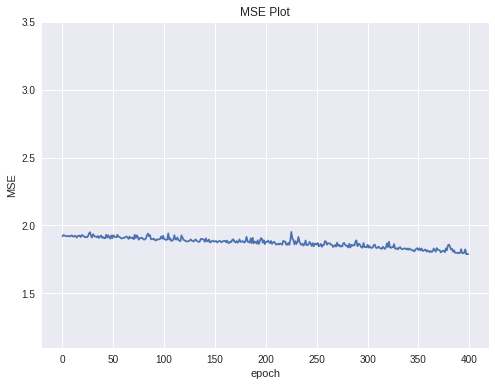

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(output_hist['mean_squared_error'])

plt.ylim(1.1, 3.5   )
plt.xlabel('epoch')
plt.ylabel('MSE')
plt.title('MSE Plot')

plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, y_pred))

5.001107664397647


# 6. Analysis

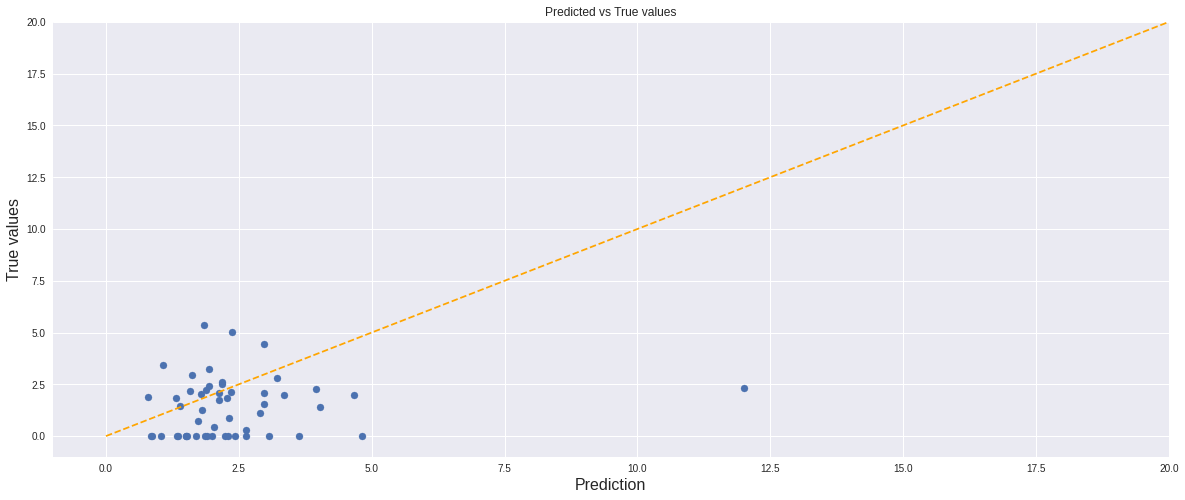

In [ ]:
# plot the results
n=20
plt.figure(figsize=(20,8))
plt.scatter(y_pred, y_test)
plt.plot(np.linspace(0,n,n), np.linspace(0,n,n), c = 'orange', linestyle='--')
plt.xlabel('Prediction', size=16)
plt.ylabel('True values',size=16)
plt.xlim(-1,n)
plt.ylim(-1,n)
plt.title('Predicted vs True values')
plt.show()

- Our ANN model could learn our data quite well. But, since the target label is very sparse, our model can predict better for forest fire area prediction with relatively small area.

    - This model can be used to deploy early warning system so before the big forest fire occured, we can prevent it by detect the small fire ocurrences.
    - If at the same time there's more than one forest fire occurences, we can allocate our sources to more potential hazardous forest fire.

- Hyperparameter tuning still needed to achieve the good fit condition. The test data learning curve shows better trend since the test data only contain relatively small area forest fire.
- Vegetation data (NDVI) and ground water data (MAT) might be added to enhance the model performance, since these variable might have correlation & causality with fire occurence. 
- Since our data is extremely imbalanced for regression case, we can perform SMOGN data preprocessing. Further read: http://proceedings.mlr.press/v74/branco17a/branco17a.pdf

